# Problem statment explanation:-

**Customers with high retention potential are more likely to continue to do business with a company, purchase more products or services, and recommend the company to others. They tend to have a positive perception of the company, trust its brand, and feel satisfied with their overall experience.On the other hand, customers with low retention potential are at risk of churning, or ending their business relationship with the company. They may have had a negative experience with the company or its products, feel dissatisfied, or perceive a lack of value in their interactions with the company.By identifying and analyzing the retention potential of its customers, a company can develop strategies to improve customer loyalty and satisfaction, increase customer lifetime value, and reduce churn rates.**

Attributes present in our data:-
*****************************************


1)CustomerID:-A unique identifier number a customer have for himself
*****************************************

2)City:-A city which a customer belong to.
*****************************************


3)DateOfRegistration:-Date when a customer registered.
*****************************************


4)OnlineCommunication:Whether a customer prefers online delivery or not.
*****************************************


5)AutomaticRefill:-Whether a customer likes his account to be refilled or not automatically when a term ends.
*****************************************


6)DoorstepDelivery:It is customer choice whether he prefer doorstep delivery or not.
*****************************************


7)PreferredDeliveryDay:A day from week on which customer prefers delivery.
*****************************************


8)Retention potential:It is a measure of the customer's loyalty and satisfaction with the company's products or services.
*****************************************


9)DateOfOrder:-Date of order generally refers to the date on which a customer placed an order with a company or a business.
*****************************************


10)timestamp:-A timestamp typically includes the year, month, day, hour, minute, and second of the event, and sometimes also includes information about the time zone or the time elapsed since a reference point.
*****************************************


11)OrderQuantity:-Order quantity generally refers to the number of units or items of a product that a customer has ordered from a business or a company. This data point is typically recorded in the company's database or order management system and is used for tracking and managing customer orders.
*****************************************


12)DateOfemail:-"Date of email" refers to the date and time when an email was sent or received by a recipient. This data point is typically recorded in the email client or email service provider's database and is used for tracking and managing email communications.
*****************************************


13)EmailType:-Email type generally refers to the category or classification of an email message based on its content or purpose. 
*****************************************


14)timestamp:-A timestamp typically includes the year, month, day, hour, minute, and second of the event, and sometimes also includes information about the time zone or the time elapsed since a reference point.
*****************************************


15)MailOpened:-The mail opened metric is commonly used in email marketing to measure the effectiveness of email campaigns and to understand the behavior of recipients.
*****************************************


16)MailClicked:-The mail clicked metric is commonly used in email marketing to measure the effectiveness of email campaigns and to understand the behavior of recipients. 
*****************************************



##Importing libraries

In [ ]:
#Import the required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
#chi-square test of independence
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import graphviz


import warnings
warnings.filterwarnings('ignore')

## conda install -c anaconda statsmodels
import statsmodels.api as sm

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

# Merging of files

In [ ]:
customer=pd.read_excel("/content/Customerdata_Train.xlsx")
train=pd.read_excel("/content/Train.xlsx")
transaction=pd.read_excel("/content/transactionsdata_Train (1).xlsx")
email=pd.read_excel("/content/Emaildata_Train (1).xlsx")

In [ ]:
transaction.columns

Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')

In [ ]:
#checking all the datasets shape to get a proper understanding
print("shape of customer",customer.shape)
print("shape of train",train.shape)
print("shape of transaction",transaction.shape)
print("shape of email",email.shape)

shape of customer (23820, 7)
shape of train (23820, 2)
shape of transaction (104755, 4)
shape of email (517672, 6)


**From this we have a understanding that our target column consists of 23820 rows,so it indirectly means we have to filter our datasets in such a way that we get 23820 unique values in customer id column for each dataset.so we will go through all the 4 datasets and check what to filter.**

lets start with customerdata

In [ ]:
#customer.head()
customer["CustomerID"].nunique()
#checking unique values for all the customer ids


23820

In [ ]:
customer.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay  
0                 0               Monday  
1                 1               Friday  
2                 0            Wednesday  
3                 0               Monday  
4                 0               Friday

**train**

In [ ]:
#train.head()
train["CustomerID"].nunique()
#checking unique values for all the customer ids

23820

*transaction*

In [ ]:
#transaction['DateOfOrder'] = pd.to_datetime(transaction['DateOfOrder'])
transaction["CustomerID"].nunique()
#checking unique values for all the customer ids

23820

In [ ]:
# combine the 'Dateoforder' and 'Timestamp' columns into a single datetime column
transaction['last_transaction_date'] = pd.to_datetime(transaction['DateOfOrder'] +' '+transaction['timestamp'])

##visualizing sales trends

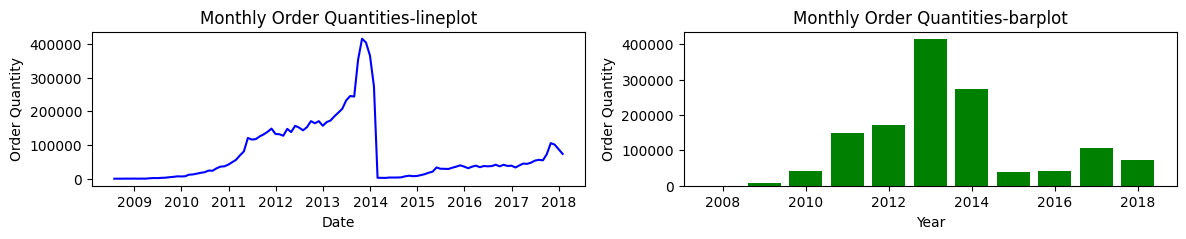

In [ ]:

monthly_orders = transaction.groupby(pd.Grouper(key='last_transaction_date', freq='M')).agg({'OrderQuantity': 'sum'})
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 2))

# Plot monthly order quantities as a line chart
axs[0].plot(monthly_orders.index, monthly_orders['OrderQuantity'], color='blue')
axs[0].set_title('Monthly Order Quantities-lineplot')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Order Quantity')

# Plot yearly order quantities as a bar chart
axs[1].bar(monthly_orders.index.year, monthly_orders['OrderQuantity'], color='green')
axs[1].set_title('Monthly Order Quantities-barplot')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Order Quantity')

# Display the plot
plt.show()

**Key points:-if we observe here,our **

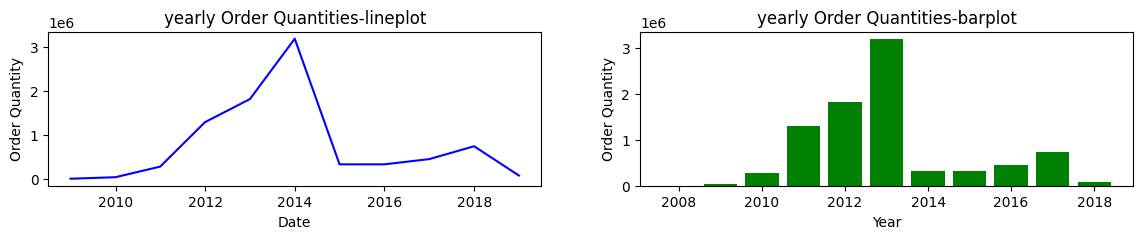

In [ ]:

yearly_orders = transaction.groupby(pd.Grouper(key='last_transaction_date', freq='Y')).agg({'OrderQuantity': 'sum'})
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 2))

# Plot monthly order quantities as a line chart
axs[0].plot(yearly_orders.index, yearly_orders['OrderQuantity'], color='blue')
axs[0].set_title('yearly Order Quantities-lineplot')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Order Quantity')

# Plot yearly order quantities as a bar chart
axs[1].bar(yearly_orders.index.year, yearly_orders['OrderQuantity'], color='green')
axs[1].set_title('yearly Order Quantities-barplot')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Order Quantity')

# Display the plot
plt.show()

**Customer retention: By analyzing the average time between purchases, businesses can determine if their customers are coming back to make repeat purchases or if they are churning. If the average time between purchases is increasing over time, it may indicate that customers are losing interest in the business or finding better alternatives.**

In [ ]:
transaction['DateOfOrder']=pd.to_datetime(transaction['DateOfOrder'])
# Sort the dataset by customer ID and purchase date
df3 = transaction.sort_values(['CustomerID', 'DateOfOrder'])

# Calculate the time between purchases for each customer
df3['time_between_purchases'] = df3.groupby('CustomerID')['DateOfOrder'].diff().dt.days.fillna(0)


In [ ]:
df3['order_month']=pd.to_datetime(df3['DateOfOrder']).dt.month

In [ ]:
# group the data by customer ID and month, and count the number of orders in each group
order_counts = df3.groupby(['CustomerID', 'order_month'])['OrderQuantity'].sum()
# use the unstack method to pivot the table so that the rows represent customers and the columns represent months
order_counts = order_counts.unstack(level=-1, fill_value=0)
# fill any missing values with 0
order_counts = order_counts.fillna(0)
order_counts.columns=["Totalorders-jan","Totalorders-feb","Totalorders-march","Totalorders-april","Totalorders-may","Totalorders-june","Totalorders-july","Totalorders-august","Totalorders-september","Totalorders-october","Totalorders-november","Totalorders-december"]
order_counts=order_counts.reset_index(drop=False)

The first line groups the data by customer ID and order month, and counts the number of orders in each group. Here's how it works:

df3.groupby(['CustomerID', 'order_month']): This groups the data by two columns, CustomerID and order_month.
['DateOfOrder'].count(): This counts the number of times each combination of CustomerID and order_month appears in the DateOfOrder column. This effectively gives us the number of orders placed by each customer in each month.
The result of this groupby operation is a Pandas Series with a multi-level index. The first level of the index corresponds to the CustomerID, and the second level corresponds to the order_month.

To turn this Series into a more useful format, we use the unstack method in the second line. The unstack method converts the innermost level of the index (in this case, the order_month) into columns, effectively pivoting the table. Here's how it works:

order_counts.unstack(level=-1, fill_value=0): This calls the unstack method on the order_counts Series.
level=-1: This tells Pandas to unstack the innermost level of the index, which corresponds to the order_month.
fill_value=0: This tells Pandas to fill any missing values with 0. If a customer didn't place any orders in a particular month, the corresponding cell in the pivoted table will be empty. By setting fill_value=0, we replace these empty cells with 0.
The result of this operation is a DataFrame with one row for each customer, and one column for each month. The cell at row i, column j contains the number of orders placed by customer i in month j.

In [ ]:
# Group the data by customer ID and calculate the number of transactions, total amount spent, and last transaction date
grouped_data = df3.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of transactions
    'OrderQuantity': ['sum','min','max'],# Total orders
    'last_transaction_date': ['min', 'max'],# first transaction date,Last transaction date
    'time_between_purchases':'mean'#avaerage time between purchases
    
})
# Rename the columns to be more descriptive
grouped_data.columns = ['num_transactions','totalorders','minimumorderquantity','maximumorderquantity','first_transaction_date','last_transaction_date','average_time_between_purchase']

In [ ]:
grouped_data['DateOfOrder'] = grouped_data['last_transaction_date'].dt.date.astype(str)
grouped_data['timestamp'] = grouped_data['last_transaction_date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
grouped_data["averageorders"]=grouped_data["totalorders"]//grouped_data["num_transactions"]
grouped_data = grouped_data.reset_index(drop=False)

In [ ]:
# merge the grouped DataFrame back with the main DataFrame
transaction_data = pd.merge(df3, grouped_data, on=['CustomerID','last_transaction_date'],how="inner")

In [ ]:
transaction_data = pd.merge(transaction_data, order_counts, on=['CustomerID'],how="inner")

In [ ]:
transaction['last_transaction_date']
transaction = transaction.rename(columns={'last_transaction_date': 'transaction_date'})

In [ ]:
#transaction_data

In [ ]:
transaction_data.shape
#rechecking for incorrect dtypes
#transaction_data["CustomerID"].nunique()
#rechecking for unique customerids

(23820, 28)

In [ ]:
transaction_data=transaction_data.drop(['DateOfOrder_x', 'timestamp_x','DateOfOrder_y', 'timestamp_y','time_between_purchases','order_month'],axis=1)

In [ ]:
transaction_data.head()

CustomerID  OrderQuantity last_transaction_date  num_transactions  \
0     C12116             33   2013-10-10 19:50:02                 3   
1     C12117             41   2013-12-05 18:47:14                 1   
2     C12118             41   2013-09-10 10:08:42                 1   
3     C12119             52   2013-10-22 20:48:00                 1   
4     C12120             31   2014-01-10 13:24:12                 1   

   totalorders  minimumorderquantity  maximumorderquantity  \
0          115                    33                    44   
1           41                    41                    41   
2           41                    41                    41   
3           52                    52                    52   
4           31                    31                    31   

  first_transaction_date  average_time_between_purchase  averageorders  \
0    2013-10-03 13:49:08                       2.333333             38   
1    2013-12-05 18:47:14                       0.000000             41   
2    2013-09-10 10:08:42                       0.000000             41   
3    2013-10-22 20:48:00                       0.000000             52   
4    2014-01-10 13:24:12                       0.000000             31   

   Totalorders-jan  Totalorders-feb  Totalorders-march  Totalorders-april  \
0                0                0                  0                  0   
1                0                0                  0                  0   
2                0                0                  0                  0   
3                0                0                  0                  0   
4               31                0                  0                  0   

   Totalorders-may  Totalorders-june  Totalorders-july  Totalorders-august  \
0                0                 0                 0                   0   
1                0                 0                 0                   0   
2                0                 0                 0                   0   
3                0                 0                 0                   0   
4                0                 0                 0                   0   

   Totalorders-september  Totalorders-october  Totalorders-november  \
0                      0                  115                     0   
1                      0                    0                     0   
2                     41                    0                     0   
3                      0                   52                     0   
4                      0                    0                     0   

   Totalorders-december  
0                     0  
1                    41  
2                     0  
3                     0  
4                     0

**for email**

In [ ]:
email.head()

CustomerID DateOfemail     EmailType timestamp MailOpened    MailClicked
0     C16368  2012-09-28  WelcomeEmail  15:56:50        yes  NotApplicable
1     C20345  2010-12-19  WelcomeEmail  15:10:30        yes  NotApplicable
2     C17683  2010-10-03  WelcomeEmail  17:12:24        yes  NotApplicable
3     C18647  2010-11-27  WelcomeEmail  16:59:02        yes  NotApplicable
4     C36692  2009-12-04  WelcomeEmail  17:27:22        yes  NotApplicable

In [ ]:
email.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [ ]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
email['emailDatetime'] = pd.to_datetime(email['DateOfemail'] +' '+email['timestamp'])

In [ ]:
email["EmailType"].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [ ]:
email.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked', 'emailDatetime'],
      dtype='object')

lets try to visualize different email categories

##visualizing emails sent year and month wise

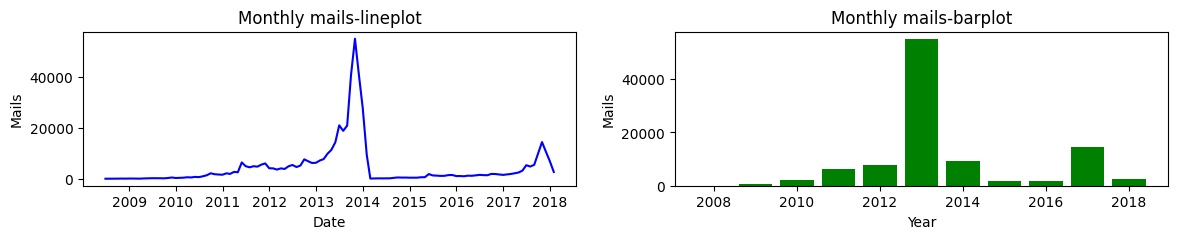

In [ ]:
#lets visualize yearwise 
monthly_mails = email.groupby(pd.Grouper(key='emailDatetime', freq='M')).agg({'emailDatetime': 'count'})
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 2))

# Plot monthly order quantities as a line chart
axs[0].plot(monthly_mails.index, monthly_mails['emailDatetime'], color='blue')
axs[0].set_title('Monthly mails-lineplot')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Mails')

# Plot monthly order quantities as a bar chart
axs[1].bar(monthly_mails.index.year, monthly_mails['emailDatetime'], color='green')
axs[1].set_title('Monthly mails-barplot')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Mails')

# Display the plot
plt.show()

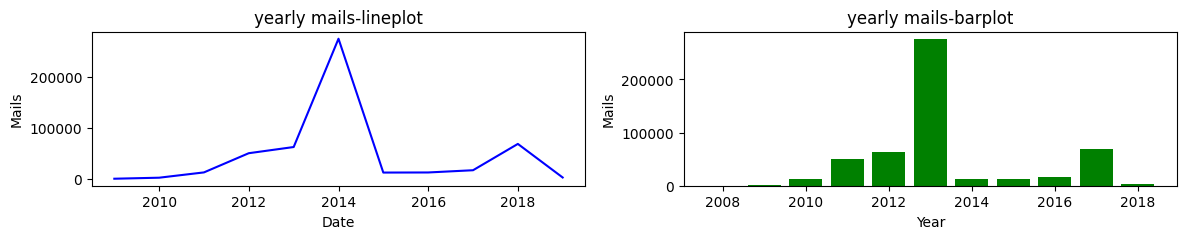

In [ ]:
#lets visualize yearwise 
yearly_mails = email.groupby(pd.Grouper(key='emailDatetime', freq='Y')).agg({'emailDatetime': 'count'})
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 2))

# Plot monthly order quantities as a line chart
axs[0].plot(yearly_mails.index, yearly_mails['emailDatetime'], color='blue')
axs[0].set_title('yearly mails-lineplot')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Mails')

# Plot yearly order quantities as a bar chart
axs[1].bar(yearly_mails.index.year, yearly_mails['emailDatetime'], color='green')
axs[1].set_title('yearly mails-barplot')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Mails')

# Display the plot
plt.show()

In [ ]:
# group the data by customer ID and month, and count the number of times mail oponed or not for each customer
mail_open_counts = email.groupby(['CustomerID', 'MailOpened'])['emailDatetime'].count()
# use the unstack method to pivot the table so that the rows represent customers and the columns represent mail oponed
mail_open_counts = mail_open_counts.unstack(level=-1, fill_value=0)
# fill any missing values with 0
mail_open_counts = mail_open_counts.fillna(0)
mail_open_counts.columns=["Totalmails-notoponed","Totalmails-oponed"]
mail_open_counts=mail_open_counts.reset_index(drop=False)

***We had calculated the total number of times a customer had oponed and total number of times a customer had not oponed his mail on receival of mail***

In [ ]:
#mail_open_counts

In [ ]:
# group the data by customer ID and month, and count the number of times mail oponed or not for each customer
MailClicked_counts = email.groupby(['CustomerID', 'MailClicked'])['emailDatetime'].count()
# use the unstack method to pivot the table so that the rows represent customers and the columns represent mail oponed
MailClicked_counts = MailClicked_counts.unstack(level=-1, fill_value=0)
# fill any missing values with 0
MailClicked_counts = MailClicked_counts.fillna(0)
MailClicked_counts.columns=["Notapplicableclickedmails","timesclicked-yes","timesclicked-no"]
MailClicked_counts=MailClicked_counts.reset_index(drop=False)

**total number of times a customer has clicked on mail and total number of times a customer had not clicked his mail from all the mails received**

In [ ]:
MailClicked_counts

CustomerID  Notapplicableclickedmails  timesclicked-yes  timesclicked-no
0         C12116                          1                29                2
1         C12117                          1                 0                0
2         C12118                          1                 0                0
3         C12119                          1                37                4
4         C12120                          1                 0                0
...          ...                        ...               ...              ...
23815     C42185                          1                43                0
23816     C42186                          1                 0                0
23817     C42187                          1                 0                0
23818     C42188                          1                 0                0
23819     C42189                          1                50                0

[23820 rows x 4 columns]

**There are two possibilities here:**

1.   a customer might have received only welcome mail but not customized mail
2.   a customer might have received both welcome mail and customized mail.
we have to filter here such a way that unique ids with welcome mail only being sent should be considered and unique ids with recent customized mail also .we will take most recent interaction with our customer till data.



In [ ]:
#filtering customers who have received welcome mail but not a customized mail
welcome_mail = email[(email['EmailType'] == 'WelcomeEmail') & ~(email['CustomerID'].isin(email[email['EmailType'] == 'CustomizedEmail']['CustomerID'].unique()))]
welcome_mail["CustomerID"].nunique()

9709

In [ ]:
welcome_mail.head()

CustomerID DateOfemail     EmailType timestamp MailOpened    MailClicked  \
2      C17683  2010-10-03  WelcomeEmail  17:12:24        yes  NotApplicable   
15     C29837  2011-02-22  WelcomeEmail  16:30:28        yes  NotApplicable   
18     C13691  2011-03-10  WelcomeEmail  12:38:08        yes  NotApplicable   
25     C14905  2009-04-24  WelcomeEmail  10:38:10        yes  NotApplicable   
30     C22750  2011-01-04  WelcomeEmail  12:26:48        yes  NotApplicable   

         emailDatetime  
2  2010-10-03 17:12:24  
15 2011-02-22 16:30:28  
18 2011-03-10 12:38:08  
25 2009-04-24 10:38:10  
30 2011-01-04 12:26:48

In [ ]:
welcome_mail.shape

(9709, 7)

**Analyzing the average time between each email can provide businesses with some insights into customer engagement and help them identify opportunities to improve customer retention.**

In [ ]:
welcome_mail['DateOfemail']=pd.to_datetime(welcome_mail['DateOfemail'])
# Sort the dataset by customer ID and purchase date
welcome_mail = welcome_mail.sort_values(['CustomerID', 'DateOfemail'])

# Calculate the time between purchases for each customer
welcome_mail['time_between_emails'] = welcome_mail.groupby('CustomerID')['DateOfemail'].diff().dt.days.fillna(0)

In [ ]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
grouped_data3 = welcome_mail.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'emailDatetime': ['max','min'], # Last email date,first email date
    'time_between_emails':'mean' 
})
# Rename the columns to be more descriptive
grouped_data3.columns = ['numofemails','lastemailDatetime','firstemailDatetime','average_time_between_mails']
grouped_data3 = grouped_data3.reset_index(drop=False)

In [ ]:
grouped_data3['DateOfemail'] = grouped_data3['lastemailDatetime'].dt.date.astype(str)
grouped_data3['timestamp'] = grouped_data3['lastemailDatetime'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
welcome_mail['DateOfemail']=welcome_mail['DateOfemail'].dt.date.astype(str)

In [ ]:

# merge the grouped DataFrame back with the main DataFrame
merged_data3 = pd.merge(welcome_mail, grouped_data3, on=['CustomerID','DateOfemail','timestamp'],how="inner")

In [ ]:
#merged_data.shape
#merged_data["CustomerID"].nunique()
#merged_data.columns
merged_data3=merged_data3.drop(['DateOfemail','timestamp'],axis=1)

In [ ]:
#filtering persons who received customized mail
customizedmail=email[email['EmailType'] == 'CustomizedEmail']

In [ ]:
customizedmail.head()

CustomerID DateOfemail        EmailType timestamp MailOpened  \
23820     C16368  2013-05-20  CustomizedEmail  15:10:30        yes   
23821     C16368  2013-02-05  CustomizedEmail  13:54:22        yes   
23822     C16368  2012-11-26  CustomizedEmail  11:22:32        yes   
23823     C16368  2013-05-30  CustomizedEmail  14:04:42        yes   
23824     C16368  2013-05-18  CustomizedEmail  10:18:16        yes   

      MailClicked       emailDatetime  
23820          no 2013-05-20 15:10:30  
23821          no 2013-02-05 13:54:22  
23822          no 2012-11-26 11:22:32  
23823          no 2013-05-30 14:04:42  
23824          no 2013-05-18 10:18:16

In [ ]:
customizedmail['DateOfemail']=pd.to_datetime(customizedmail['DateOfemail'])
# Sort the dataset by customer ID and purchase date
customizedmail = customizedmail.sort_values(['CustomerID', 'DateOfemail'])

# Calculate the time between purchases for each customer
customizedmail['time_between_emails'] = customizedmail.groupby('CustomerID')['DateOfemail'].diff().dt.days.fillna(0)

In [ ]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
grouped_data2 = customizedmail.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'emailDatetime': ['max','min'], # Last email date,first email date
    'time_between_emails':'mean' 
})

In [ ]:
grouped_data2

CustomerID       emailDatetime                      \
                count                 max                 min   
CustomerID                                                      
C12116             31 2013-10-09 11:49:08 2013-09-24 11:48:56   
C12119             41 2013-10-21 10:24:24 2013-04-22 17:13:42   
C12122             45 2013-04-09 10:21:20 2012-11-13 10:29:56   
C12123             28 2014-01-10 13:59:24 2013-11-16 16:01:48   
C12124             32 2013-11-06 17:45:54 2013-10-31 13:22:32   
...               ...                 ...                 ...   
C42181             47 2013-10-29 11:53:36 2011-08-14 10:06:08   
C42182             49 2013-11-28 17:51:08 2012-08-31 10:32:00   
C42183             41 2017-08-13 17:43:26 2017-08-07 11:18:38   
C42185             43 2011-12-30 13:52:52 2011-03-05 11:01:04   
C42189             50 2013-11-05 16:32:30 2013-01-20 16:07:58   

           time_between_emails  
                          mean  
CustomerID                      
C12116                0.483871  
C12119                4.439024  
C12122                3.266667  
C12123                1.964286  
C12124                0.187500  
...                        ...  
C42181               17.170213  
C42182                9.265306  
C42183                0.146341  
C42185                6.976744  
C42189                5.780000  

[14111 rows x 4 columns]

In [ ]:
# Rename the columns to be more descriptive
grouped_data2.columns = ['numofemails','lastemailDatetime','firstemailDatetime','average_time_between_mails']
grouped_data2 = grouped_data2.reset_index(drop=False)

In [ ]:
grouped_data2.head()

CustomerID  numofemails   lastemailDatetime  firstemailDatetime  \
0     C12116           31 2013-10-09 11:49:08 2013-09-24 11:48:56   
1     C12119           41 2013-10-21 10:24:24 2013-04-22 17:13:42   
2     C12122           45 2013-04-09 10:21:20 2012-11-13 10:29:56   
3     C12123           28 2014-01-10 13:59:24 2013-11-16 16:01:48   
4     C12124           32 2013-11-06 17:45:54 2013-10-31 13:22:32   

   average_time_between_mails  
0                    0.483871  
1                    4.439024  
2                    3.266667  
3                    1.964286  
4                    0.187500

In [ ]:
grouped_data2['DateOfemail'] = grouped_data2['lastemailDatetime'].dt.date.astype(str)
grouped_data2['timestamp'] = grouped_data2['lastemailDatetime'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
customizedmail['DateOfemail']=customizedmail['DateOfemail'].dt.date.astype(str)

In [ ]:

# merge the grouped DataFrame back with the main DataFrame
merged_data = pd.merge(customizedmail, grouped_data2, on=['CustomerID','DateOfemail','timestamp'],how="inner")

In [ ]:
merged_data

CustomerID DateOfemail        EmailType timestamp MailOpened  \
0         C12116  2013-10-09  CustomizedEmail  11:49:08         no   
1         C12119  2013-10-21  CustomizedEmail  10:24:24         no   
2         C12122  2013-04-09  CustomizedEmail  10:21:20         no   
3         C12123  2014-01-10  CustomizedEmail  13:59:24         no   
4         C12124  2013-11-06  CustomizedEmail  17:45:54         no   
...          ...         ...              ...       ...        ...   
14106     C42181  2013-10-29  CustomizedEmail  11:53:36        yes   
14107     C42182  2013-11-28  CustomizedEmail  17:51:08         no   
14108     C42183  2017-08-13  CustomizedEmail  17:43:26         no   
14109     C42185  2011-12-30  CustomizedEmail  13:52:52         no   
14110     C42189  2013-11-05  CustomizedEmail  16:32:30        yes   

      MailClicked       emailDatetime  time_between_emails  numofemails  \
0              no 2013-10-09 11:49:08                  0.0           31   
1              no 2013-10-21 10:24:24                  9.0           41   
2              no 2013-04-09 10:21:20                  6.0           45   
3              no 2014-01-10 13:59:24                  1.0           28   
4              no 2013-11-06 17:45:54                  0.0           32   
...           ...                 ...                  ...          ...   
14106          no 2013-10-29 11:53:36                 53.0           47   
14107          no 2013-11-28 17:51:08                  2.0           49   
14108          no 2017-08-13 17:43:26                  0.0           41   
14109          no 2011-12-30 13:52:52                  2.0           43   
14110          no 2013-11-05 16:32:30                  1.0           50   

        lastemailDatetime  firstemailDatetime  average_time_between_mails  
0     2013-10-09 11:49:08 2013-09-24 11:48:56                    0.483871  
1     2013-10-21 10:24:24 2013-04-22 17:13:42                    4.439024  
2     2013-04-09 10:21:20 2012-11-13 10:29:56                    3.266667  
3     2014-01-10 13:59:24 2013-11-16 16:01:48                    1.964286  
4     2013-11-06 17:45:54 2013-10-31 13:22:32                    0.187500  
...                   ...                 ...                         ...  
14106 2013-10-29 11:53:36 2011-08-14 10:06:08                   17.170213  
14107 2013-11-28 17:51:08 2012-08-31 10:32:00                    9.265306  
14108 2017-08-13 17:43:26 2017-08-07 11:18:38                    0.146341  
14109 2011-12-30 13:52:52 2011-03-05 11:01:04                    6.976744  
14110 2013-11-05 16:32:30 2013-01-20 16:07:58                    5.780000  

[14111 rows x 12 columns]

In [ ]:
#merged_data.shape
#merged_data["CustomerID"].nunique()
#merged_data.columns
merged_data=merged_data.drop(['DateOfemail','timestamp'],axis=1)

In [ ]:
merged_data.shape

(14111, 10)

In [ ]:
merged_data3.shape

(9709, 10)

In [ ]:
mail_data= pd.concat([merged_data3,merged_data])
mail_data.head()

CustomerID     EmailType MailOpened    MailClicked       emailDatetime  \
0     C12117  WelcomeEmail        yes  NotApplicable 2013-12-05 15:59:30   
1     C12118  WelcomeEmail        yes  NotApplicable 2013-09-10 14:49:14   
2     C12120  WelcomeEmail        yes  NotApplicable 2014-01-10 11:40:10   
3     C12126  WelcomeEmail        yes  NotApplicable 2013-09-13 12:56:02   
4     C12137  WelcomeEmail        yes  NotApplicable 2017-10-05 13:53:38   

   time_between_emails  numofemails   lastemailDatetime  firstemailDatetime  \
0                  0.0            1 2013-12-05 15:59:30 2013-12-05 15:59:30   
1                  0.0            1 2013-09-10 14:49:14 2013-09-10 14:49:14   
2                  0.0            1 2014-01-10 11:40:10 2014-01-10 11:40:10   
3                  0.0            1 2013-09-13 12:56:02 2013-09-13 12:56:02   
4                  0.0            1 2017-10-05 13:53:38 2017-10-05 13:53:38   

   average_time_between_mails  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [ ]:
mail_data=mail_data.drop(["time_between_emails"],axis=1)

now we have to merge all files into single dataframe

In [ ]:
train=customer.merge(train, on="CustomerID").merge(mail_data, on="CustomerID").merge(transaction_data, on="CustomerID").merge(mail_open_counts, on="CustomerID").merge(MailClicked_counts, on="CustomerID")
train.shape

(23820, 42)

# Data exploration and visualization-Exploratory data analysis

**Preprocessing steps:-**


1.Explaining problem statment

2.Data structure and content

3.Exploratory data analysis

4.Visual Analysis of data 

5.Extracting insights





*1)PROBLEM STATMENT EXPLANATION*:-
Predicting the retail customer retention potential level as high/medium/low &  Customer Segmentation & Pattern extraction.
Retail customer retention potential level refers to the likelihood of customers returning to make additional purchases from a retail business. This potential can be categorized into three levels: high, medium, and low. High potential customers are those who are likely to make repeat purchases and remain loyal to the brand. Medium potential customers may make additional purchases but are not as likely to remain loyal. Low potential customers are unlikely to make additional purchases or remain loyal to the brand.


*2)DATA STRUCTURE AND CONTENT*

In [ ]:
#To veiw first five rows and five columns
train.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay RetentionPotential        EmailType  \
0                 0               Monday               High  CustomizedEmail   
1                 1               Friday                Low  CustomizedEmail   
2                 0            Wednesday             Medium     WelcomeEmail   
3                 0               Monday                Low  CustomizedEmail   
4                 0               Friday                Low  CustomizedEmail   

  MailOpened    MailClicked       emailDatetime  numofemails  \
0        yes             no 2013-07-25 12:46:04           29   
1        yes             no 2013-12-19 14:28:06           95   
2        yes  NotApplicable 2010-10-03 17:12:24            1   
3        yes             no 2012-12-17 11:00:04           30   
4         no             no 2014-01-16 13:34:52           64   

    lastemailDatetime  firstemailDatetime  average_time_between_mails  \
0 2013-07-25 12:46:04 2012-10-07 17:29:40                   10.034483   
1 2013-12-19 14:28:06 2010-12-21 10:43:32                   11.515789   
2 2010-10-03 17:12:24 2010-10-03 17:12:24                    0.000000   
3 2012-12-17 11:00:04 2011-02-10 16:19:20                   22.533333   
4 2014-01-16 13:34:52 2009-12-24 10:59:42                   23.187500   

   OrderQuantity last_transaction_date  num_transactions  totalorders  \
0             15   2013-08-11 15:17:52                 1           15   
1             84   2014-01-19 18:11:30               186        15614   
2             34   2011-07-06 18:12:10                13          443   
3            111   2013-01-28 17:04:46                 7          748   
4             69   2014-01-16 11:21:46                34         2350   

   minimumorderquantity  maximumorderquantity first_transaction_date  \
0                    15                    15    2013-08-11 15:17:52   
1                    61                   108    2011-04-01 19:50:00   
2                    27                    51    2010-12-01 11:38:20   
3                    92                   117    2010-11-29 15:23:52   
4                    55                    83    2011-09-21 19:54:50   

   average_time_between_purchase  averageorders  Totalorders-jan  \
0                       0.000000             15                0   
1                       5.505376             83              671   
2                      16.692308             34               68   
3                     113.000000            106              111   
4                      24.941176             69               69   

   Totalorders-feb  Totalorders-march  Totalorders-april  Totalorders-may  \
0                0                  0                  0                0   
1             1145                696               1303             1516   
2                0                 64                 70               64   
3              114                  0                  0              216   
4              148                211                279              131   

   Totalorders-june  Totalorders-july  Totalorders-august  \
0                 0                 0                  15   
1              1523              1679                1675   
2                80                34                   0   
3                 0                 0                 105   
4               249               137                 214   

   Totalorders-september  Totalorders-october  Totalorders-november  \
0                      0          

In [ ]:
#to know how many rows and columns are present
train.shape

(23820, 42)

In [ ]:
#understanding datatypes of each column
train.dtypes

CustomerID                               object
City                                     object
DateOfRegistration               datetime64[ns]
OnlineCommunication                       int64
AutomaticRefill                           int64
DoorstepDelivery                          int64
PreferredDeliveryDay                     object
RetentionPotential                       object
EmailType                                object
MailOpened                               object
MailClicked                              object
emailDatetime                    datetime64[ns]
numofemails                               int64
lastemailDatetime                datetime64[ns]
firstemailDatetime               datetime64[ns]
average_time_between_mails              float64
OrderQuantity                             int64
last_transaction_date            datetime64[ns]
num_transactions                          int64
totalorders                               int64
minimumorderquantity                    

In [ ]:
#checking for unique values in each column such that we could whether there are any incorrect dtypes
for i in train.columns:
  print("no of unique values and dtype:","|",i,"|",train[i].nunique(),"|",train[i].dtype)

no of unique values and dtype: | CustomerID | 23820 | object
no of unique values and dtype: | City | 4 | object
no of unique values and dtype: | DateOfRegistration | 2673 | datetime64[ns]
no of unique values and dtype: | OnlineCommunication | 2 | int64
no of unique values and dtype: | AutomaticRefill | 2 | int64
no of unique values and dtype: | DoorstepDelivery | 2 | int64
no of unique values and dtype: | PreferredDeliveryDay | 7 | object
no of unique values and dtype: | RetentionPotential | 3 | object
no of unique values and dtype: | EmailType | 2 | object
no of unique values and dtype: | MailOpened | 2 | object
no of unique values and dtype: | MailClicked | 3 | object
no of unique values and dtype: | emailDatetime | 23771 | datetime64[ns]
no of unique values and dtype: | numofemails | 83 | int64
no of unique values and dtype: | lastemailDatetime | 23771 | datetime64[ns]
no of unique values and dtype: | firstemailDatetime | 23789 | datetime64[ns]
no of unique values and dtype: | avera

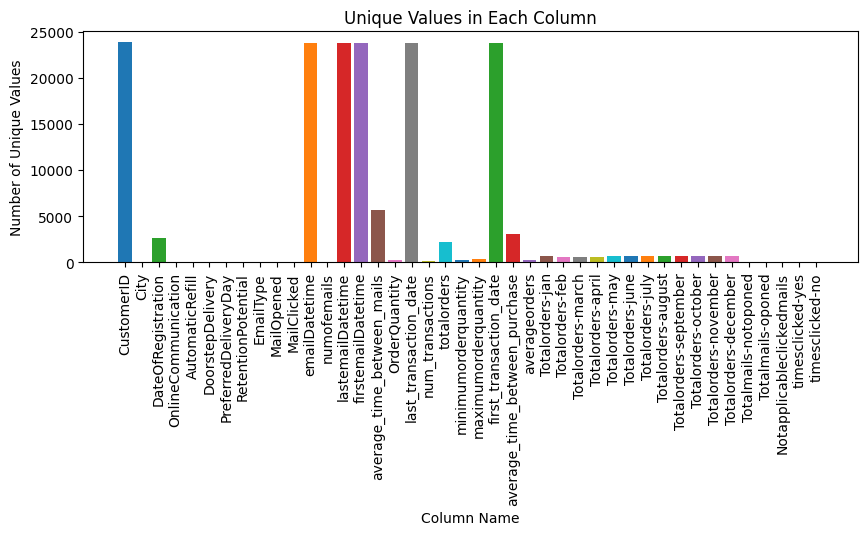

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
# Iterating over the columns
for col in train.columns:
    # Calculate the number of unique values in the column
    num_unique = len(train[col].unique())
    # Plot a bar for each column
    ax.bar(col, num_unique)
# Customize the chart
ax.set_xlabel('Column Name')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Unique Values in Each Column')
plt.xticks(rotation=90)

# Show the chart
plt.show()


**if we observe here Online comminication,automatic refill,DoorstepDelivery are labelled incorrect dtypes,so we have to convert these datatypes**

In [ ]:
#converting dtypes of the following columns
train["OnlineCommunication"]=train["OnlineCommunication"].astype("object")
train["DoorstepDelivery"]=train["DoorstepDelivery"].astype("object")
train["AutomaticRefill"]=train["AutomaticRefill"].astype("object")


In [ ]:
# Basic Info of the Data Frame
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CustomerID                     23820 non-null  object        
 1   City                           23820 non-null  object        
 2   DateOfRegistration             23820 non-null  datetime64[ns]
 3   OnlineCommunication            23820 non-null  object        
 4   AutomaticRefill                23820 non-null  object        
 5   DoorstepDelivery               23820 non-null  object        
 6   PreferredDeliveryDay           23820 non-null  object        
 7   RetentionPotential             23820 non-null  object        
 8   EmailType                      23820 non-null  object        
 9   MailOpened                     23820 non-null  object        
 10  MailClicked                    23820 non-null  object        
 11  emailDatetime  

**if we observe here we dont have problem of null values here,so no imputation is required as of now**

we can get new columns from existing which might be useful for our analysis:

1)difference between our last_transaction_date and first_transaction_date to know a customer interaction or to know how long a customer has been purchasing in the platform .

2)difference between first email and last email to know what is email_duration.email_duration refers to the time period between the first and last email of a particular campaign or sequence.For example, if the email_duration is too short, it may suggest that you are not giving your audience enough time to engage with your content. Conversely, if the cadence is too long, it may indicate that your emails are not engaging enough or that you are not providing enough value to your subscribers.



3)difference between date of regestration and last transaction data also helps us to know how old or new our customer.By subtracting the registration date from the last transaction date, you can determine the total duration of the customer's relationship with the company

In [ ]:
train["days_since_first_transaction"]=(train['last_transaction_date'] - train['first_transaction_date']).dt.days
train["email_duration"]=(train['lastemailDatetime']- train['firstemailDatetime']).dt.days
train["duration_of_customer_relation"]=(train['last_transaction_date'] - train['DateOfRegistration']).dt.days

4)the time elapsed since the customer's last transaction.The resulting values will be a measure of the duration of time since each customer's last transaction.Here are some reasons why calculating the time elapsed since the customer's last transaction is important:
Identify at-risk customers: If a customer has not made a purchase in a long time, they may be at risk of churn. By tracking the time elapsed since their last transaction, you can identify at-risk customers and take steps to retain them.Measure customer engagement: Customers who make frequent purchases are generally more engaged with your products or services. By measuring the time elapsed since their last transaction, you can get a sense of how engaged customers are and identify opportunities to increase engagement.Develop targeted marketing campaigns: Customers who have not made a purchase in a while may be more likely to respond to targeted marketing campaigns. By segmenting customers based on the time elapsed since their last transaction, you can develop campaigns that are tailored to their specific needs and interests.Overall, calculating the time elapsed since the customer's last transaction is a valuable metric for understanding customer behavior and developing effective marketing and retention strategies.





In [ ]:
train["recency"]=(train["last_transaction_date"].max()-train["last_transaction_date"]).dt.days

We will drop few columns such as first transaction date,first email date as we kept those columns only to identify the difference between the latest one and them,no we will drop this columns

In [ ]:
#train=train.drop(["first_transaction_date","firstemailDatetime","emailDatetime"],axis=1)

1)if we observe here if first transaction is last transaction,then difference will be coming out as 0 but it would be irrelevant to context of our data.In such cases either we should not consider the rows with zeroes,or we have to bin this columns as categorical columns.
2)if we observe here if first email is last email,then difference will be coming out as 0 in email cadence column but it would be irrelevant to context of our data.In such cases either we should not consider the rows with zeroes,or we have to bin this columns as categorical columns.
so we will bin this two columns.

In [ ]:

bins = pd.cut(train["days_since_first_transaction"], [-1, 1, 10, 100, train["days_since_first_transaction"].max()], labels=["Only transaction", "Recent Transactions", "Moderate History", "Long-term History"])
train["days_since_first_transaction_category"] = bins
train["days_since_first_transaction_category"].value_counts()

Only transaction       15013
Long-term History       4111
Moderate History        3989
Recent Transactions      707
Name: days_since_first_transaction_category, dtype: int64

In [ ]:
bins = pd.cut(train["email_duration"], [-1, 1, 10, 100, train["email_duration"].max()], labels=["Only email", "Medium history", "long mail history", "very Long mail History"])
train["email_duration_category"] = bins
train["email_duration_category"].value_counts()

Only email                10954
long mail history          6026
very Long mail History     4960
Medium history             1880
Name: email_duration_category, dtype: int64

In [ ]:
train["email_duration_category"]=train["email_duration_category"].astype("object")
train["days_since_first_transaction_category"]=train["days_since_first_transaction_category"].astype("object")

In [ ]:

#as we had already binned this columns so we will drop them
#train=train.drop(["days_since_first_transaction","email_duration"],axis=1)

In [ ]:
#understanding statstical info of our data
train.describe()

numofemails  average_time_between_mails  OrderQuantity  \
count  23820.000000                23820.000000   23820.000000   
mean      21.140260                    3.318651      62.107976   
std       19.620475                   12.121427      38.729691   
min        1.000000                    0.000000       0.000000   
25%        1.000000                    0.000000      41.000000   
50%       19.000000                    0.210526      51.000000   
75%       40.000000                    2.116279      75.000000   
max      291.000000                  561.000000    1501.000000   

       num_transactions   totalorders  minimumorderquantity  \
count      23820.000000  23820.000000          23820.000000   
mean           4.397775    357.622922             58.586608   
std           12.142475   1335.649680             36.428571   
min            1.000000      0.000000              0.000000   
25%            1.000000     41.000000             40.000000   
50%            1.000000     65.000000             48.000000   
75%            3.000000    169.000000             69.000000   
max          257.000000  51429.000000           1501.000000   

       maximumorderquantity  average_time_between_purchase  averageorders  \
count          23820.000000                   23820.000000   23820.000000   
mean              65.653778                      12.527876      61.931444   
std               41.270385                      36.102332      38.318825   
min                0.000000                       0.000000       0.000000   
25%               41.000000                       0.000000      41.000000   
50%               53.000000                       0.000000      51.000000   
75%               80.000000                      10.000000      74.000000   
max             1501.000000                     807.500000    1501.000000   

       Totalorders-jan  Totalorders-feb  Totalorders-march  Totalorders-april  \
count     23820.000000     23820.000000       23820.000000       23820.000000   
mean         32.711545        19.269270          21.799874          22.378757   
std         128.808814       103.623359         114.836843         113.052766   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.000000         0.000000           0.000000           0.000000   
50%           0.000000         0.000000           0.000000           0.000000   
75%           0.000000         0.000000           0.000000           0.000000   
max        3788.000000      3198.000000        3670.000000        3679.000000   

       Totalorders-may  Totalorders-june  Totalorders-july  \
count      23820.00000      23820.000000      23820.000000   
mean          26.32351         27.053904         27.685516   
std          125.30813        127.011724        129.660528   
min            0.00000          0.000000          0.000000   
25%            0.00000          0.000000          0.000000   
50%            0.00000          0.000000          0.000000   
75%            0.00000          0.000000          0.000000   
max         6114.00000       4939.000000       4035.000000   

       Totalorders-august  Totalorders-september  Totalorders-october  \
count        23820.000000           23820.000000         23820.000000   
mean            28.474349              35.221662            39.969941   
std            130.733997             132.849129           138.678043   
min              0.000000               0.000000             0.000000   
25%              0.000000               0.000000             0.000000   
50%              0.000000               0.000000             0.000000   
75%              0.000000              10.250000            41.000000   
max           5179.000000            3358.000000          4845.000000   

       Totalorders-november  Totalorders-december  Totalmails-notoponed  \
count          23820.000000          23820.000000          23820.000000   
mean              40.028128             36.706465     

In [ ]:
#train.dtypes

if we observe we have extreme value present in each of column.so we will think whther to replace those columns or transform them on basis of boxplot we will get

In [ ]:
#sepreating numerical and categorical columns
numericalcolumns=[]
categoricalcolumns=[]
datetypecolumns=[]
for i in train.columns:
  if train[i].dtypes=="object":
    categoricalcolumns.append(i)
  elif train[i].dtypes=="datetime64[ns]": 
    datetypecolumns.append(i) 
  else:
    numericalcolumns.append(i)   

In [ ]:
print(numericalcolumns)
print(categoricalcolumns)
print(datetypecolumns)

['numofemails', 'average_time_between_mails', 'OrderQuantity', 'num_transactions', 'totalorders', 'minimumorderquantity', 'maximumorderquantity', 'average_time_between_purchase', 'averageorders', 'Totalorders-jan', 'Totalorders-feb', 'Totalorders-march', 'Totalorders-april', 'Totalorders-may', 'Totalorders-june', 'Totalorders-july', 'Totalorders-august', 'Totalorders-september', 'Totalorders-october', 'Totalorders-november', 'Totalorders-december', 'Totalmails-notoponed', 'Totalmails-oponed', 'Notapplicableclickedmails', 'timesclicked-yes', 'timesclicked-no', 'days_since_first_transaction', 'email_duration', 'duration_of_customer_relation', 'recency']
['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay', 'RetentionPotential', 'EmailType', 'MailOpened', 'MailClicked', 'days_since_first_transaction_category', 'email_duration_category']
['DateOfRegistration', 'emailDatetime', 'lastemailDatetime', 'firstemailDatetime', 'last_transactio

*3.Data Quality Check And Missing Values*

*3.1 Percentage of missing values for columns*

In [ ]:
# checking column-wise null percentages
cols = pd.DataFrame(train.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                                       precentage_missing_value
CustomerID                                                  0.0
Totalorders-feb                                             0.0
Totalorders-march                                           0.0
Totalorders-april                                           0.0
Totalorders-may                                             0.0
Totalorders-june                                            0.0
Totalorders-july                                            0.0
Totalorders-august                                          0.0
Totalorders-september                                       0.0
Totalorders-october                                         0.0
Totalorders-jan                                             0.0
Totalorders-november                                        0.0
Totalmails-notoponed                                        0.0
Totalmails-oponed                                           0.0
Notapplicableclickedmails               

**Though there are no missing values in columns such as average_time_between_mails,average_time_between_purchase but there cannot be 0s in rows of those columns so we will have to replace them either with mean,median by checking distributions(dist plot) or bin this columns with few labels**

<Axes: xlabel='average_time_between_mails', ylabel='Density'>

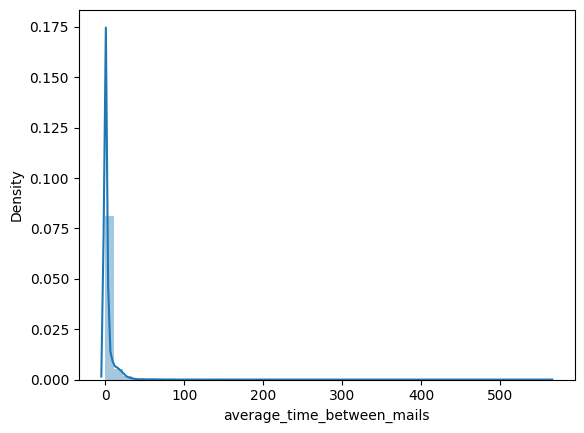

In [ ]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(train["average_time_between_mails"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution and even it is not clear.we will replace here with median as it is not affected by outliers

<Axes: xlabel='average_time_between_purchase', ylabel='Density'>

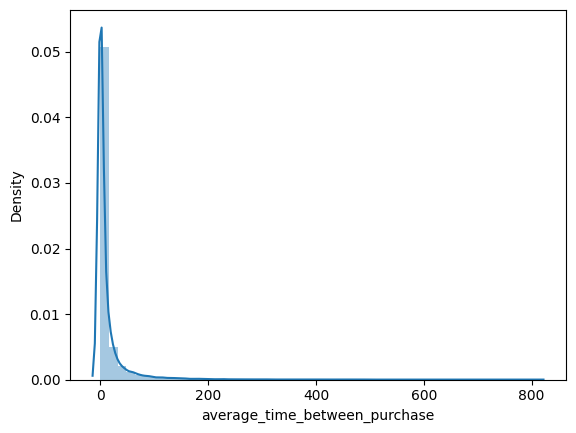

In [ ]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(train["average_time_between_purchase"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution and even it is not clear.we will replace here with median as it is not affected by outliers

In [ ]:
#train.columns

In [ ]:
#1)for column average_time_between_mails
# replace zeros with NaN
train["average_time_between_mails"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =train["average_time_between_mails"].median()
train["average_time_between_mails"].fillna(median, inplace=True)
#2)for column average_time_between_purchase
# replace zeros with NaN
train["average_time_between_purchase"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =train["average_time_between_purchase"].median()
train["average_time_between_purchase"].fillna(median, inplace=True)

In [ ]:
# Check total duplicated values
train.duplicated().sum()

0

In [ ]:
train["Totalorderquantity_in_first_quarter"]=train["Totalorders-jan"]+train["Totalorders-feb"]+train["Totalorders-march"]++train["Totalorders-april"]
train["Totalorderquantity_in_second_quarter"]=train["Totalorders-may"]+train["Totalorders-june"]+train["Totalorders-july"]++train["Totalorders-august"]
train["Totalorderquantity_in_Third_quarter"]=train["Totalorders-december"]+train["Totalorders-september"]+train["Totalorders-october"]++train["Totalorders-november"]


In [ ]:
train=train.drop(['Totalorders-jan', 'Totalorders-feb',
       'Totalorders-march', 'Totalorders-april', 'Totalorders-may',
       'Totalorders-june', 'Totalorders-july', 'Totalorders-august',
       'Totalorders-september', 'Totalorders-october', 'Totalorders-november',
       'Totalorders-december'],axis=1)


**checking categorical columns**

In [ ]:
train["City"].value_counts()

CITY4    9143
CITY2    6879
CITY3    6490
CITY1    1308
Name: City, dtype: int64

In [ ]:
train["OnlineCommunication"].value_counts()
# map OnlineCommunication to new categories
new_categories = {
    0: 'no',
    1: 'yes',
}
train['OnlineCommunication'] = train['OnlineCommunication'].map(new_categories)

# print the resulting dataframe
print(train['OnlineCommunication'].value_counts())

yes    15731
no      8089
Name: OnlineCommunication, dtype: int64


In [ ]:
#train["AutomaticRefill"].value_counts()
# map AutomaticRefill to new categories
new_categories = {
    0: 'no',
    1: 'yes',
}
train['AutomaticRefill'] = train['AutomaticRefill'].map(new_categories)

# print the resulting dataframe
print(train['AutomaticRefill'].value_counts())

no     21564
yes     2256
Name: AutomaticRefill, dtype: int64


In [ ]:
#train["DoorstepDelivery"].value_counts()
# map DoorstepDelivery to new categories
new_categories = {
    0: 'no',
    1: 'yes',
}
train['DoorstepDelivery'] = train['DoorstepDelivery'].map(new_categories)

# print the resulting dataframe
print(train['DoorstepDelivery'].value_counts())

no     22924
yes      896
Name: DoorstepDelivery, dtype: int64


In [ ]:
train["PreferredDeliveryDay"].value_counts()
# map PreferredDeliveryDay to new categories
new_categories = {
    'Monday': 'Monday',
    'Tuesday':'Tuesday',
    'Wednesday':'Wednesday',
    'Thursday':'Thursday',
    'Friday':'Friday',
    'Saturday':'weekend',
    'Sunday':'weekend'

}
train['PreferredDeliveryDay'] = train['PreferredDeliveryDay'].map(new_categories)

# print the resulting dataframe
print(train['PreferredDeliveryDay'].value_counts())

Tuesday      5343
Monday       5300
Friday       4167
Thursday     4043
Wednesday    3778
weekend      1189
Name: PreferredDeliveryDay, dtype: int64


In [ ]:
train["RetentionPotential"].value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [ ]:
train["EmailType"].value_counts()

CustomizedEmail    14111
WelcomeEmail        9709
Name: EmailType, dtype: int64

In [ ]:
train["MailOpened"].value_counts()

yes    13749
no     10071
Name: MailOpened, dtype: int64

In [ ]:
train["MailClicked"].value_counts()

no               13191
NotApplicable     9709
yes                920
Name: MailClicked, dtype: int64

In [ ]:
train["Notapplicableclickedmails"].value_counts()#there is only one value present in whole hence we can remove this column.
train=train.drop(["Notapplicableclickedmails"],axis=1)

In [ ]:
for i in categoricalcolumns:
  train[i]=train[i].astype("category")

In [ ]:
train[categoricalcolumns].dtypes

CustomerID                               category
City                                     category
OnlineCommunication                      category
AutomaticRefill                          category
DoorstepDelivery                         category
PreferredDeliveryDay                     category
RetentionPotential                       category
EmailType                                category
MailOpened                               category
MailClicked                              category
days_since_first_transaction_category    category
email_duration_category                  category
dtype: object

In [ ]:
#sepreating numerical and categorical columns
numericalcolumns=[]
categoricalcolumns=[]
datetypecolumns=[]
for i in train.columns:
  if train[i].dtypes=="category":
    categoricalcolumns.append(i)
  elif train[i].dtypes=="datetime64[ns]": 
    datetypecolumns.append(i) 
  else:
    numericalcolumns.append(i)

In [ ]:
numericalcolumns

['numofemails',
 'average_time_between_mails',
 'OrderQuantity',
 'num_transactions',
 'totalorders',
 'minimumorderquantity',
 'maximumorderquantity',
 'average_time_between_purchase',
 'averageorders',
 'Totalmails-notoponed',
 'Totalmails-oponed',
 'timesclicked-yes',
 'timesclicked-no',
 'days_since_first_transaction',
 'email_duration',
 'duration_of_customer_relation',
 'recency',
 'Totalorderquantity_in_first_quarter',
 'Totalorderquantity_in_second_quarter',
 'Totalorderquantity_in_Third_quarter']

**outlier analysis for numerical columns**

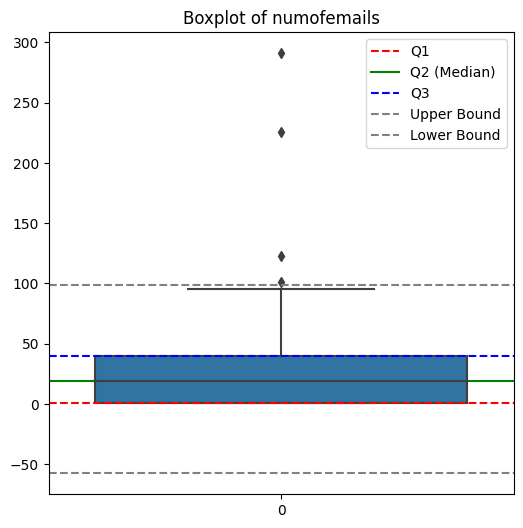

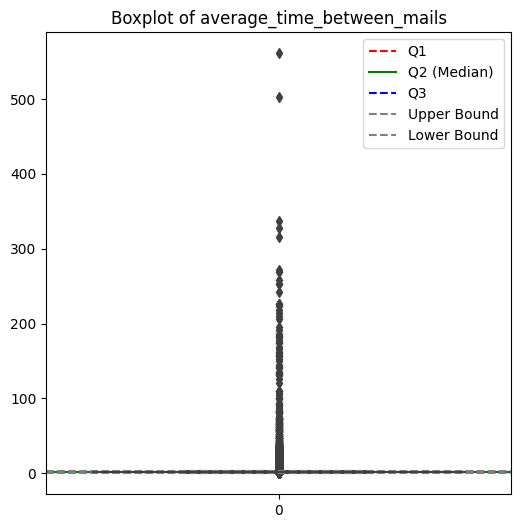

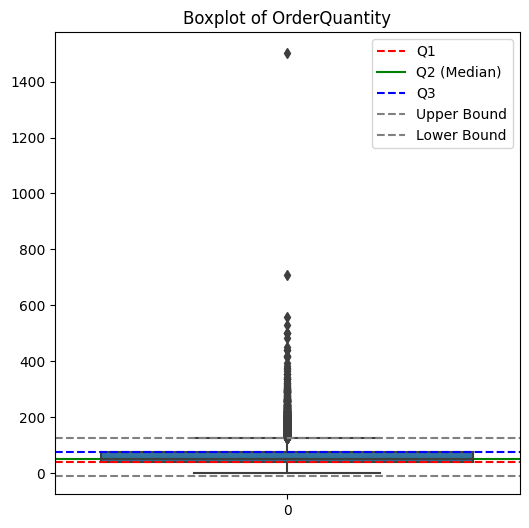

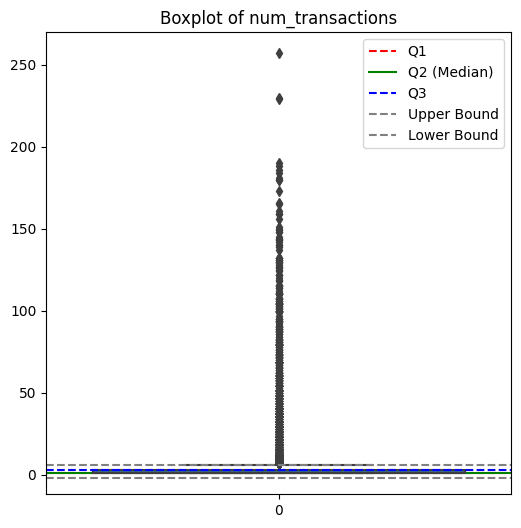

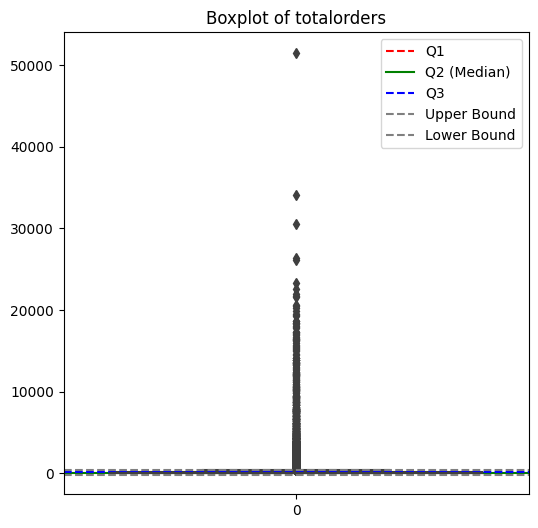

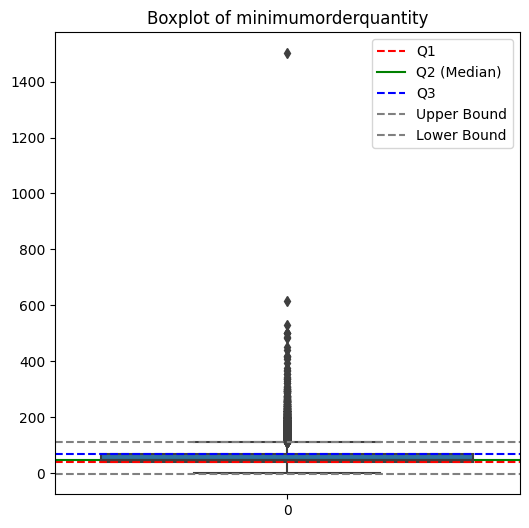

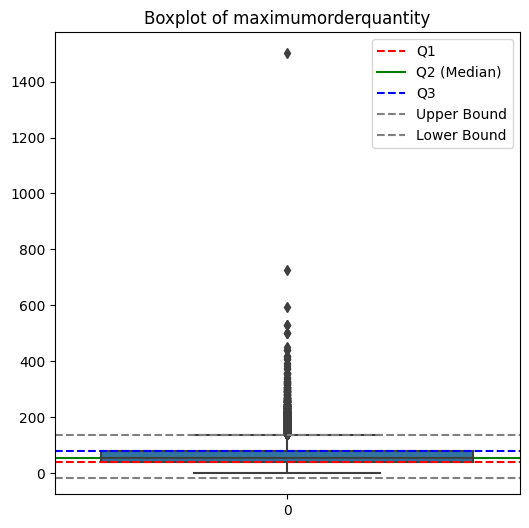

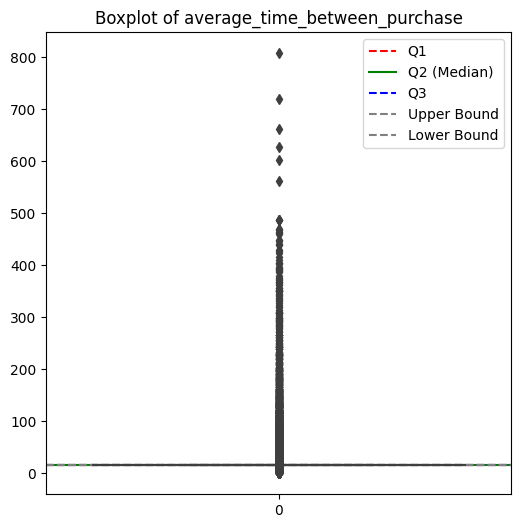

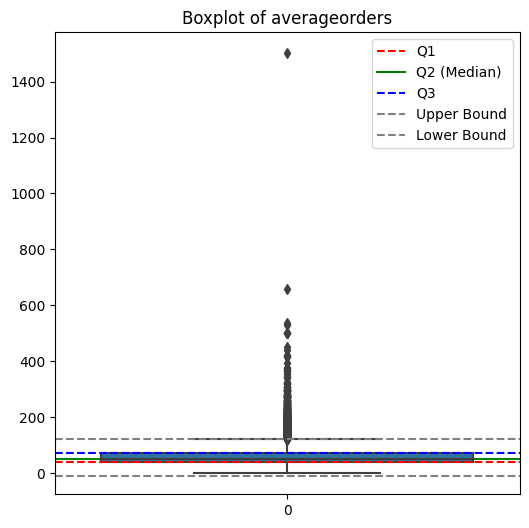

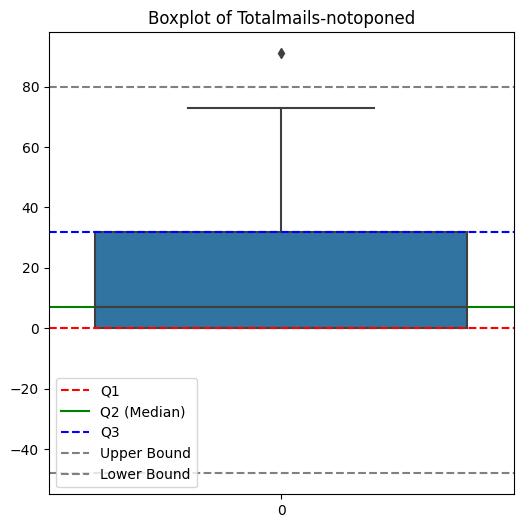

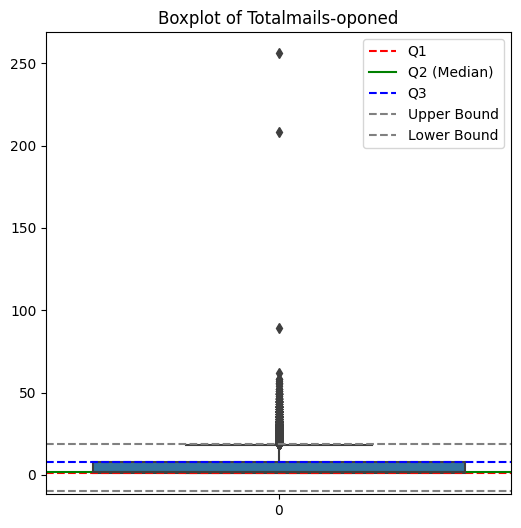

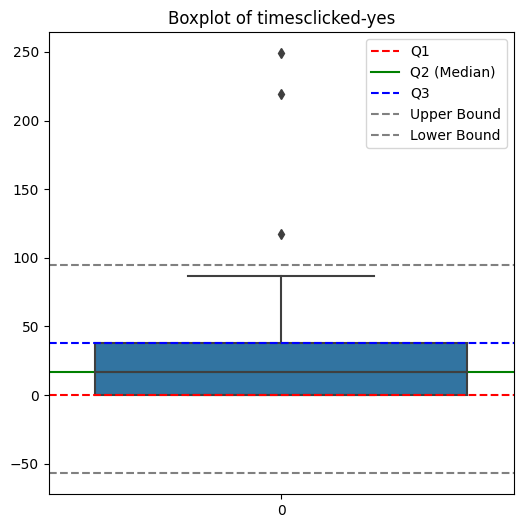

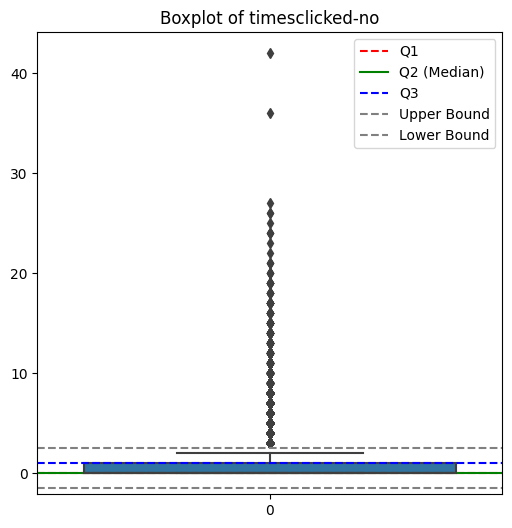

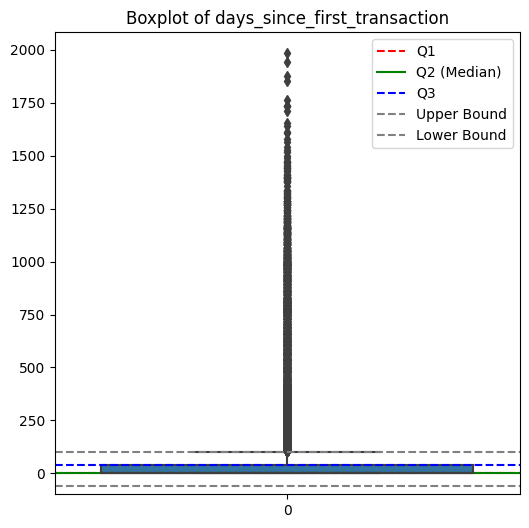

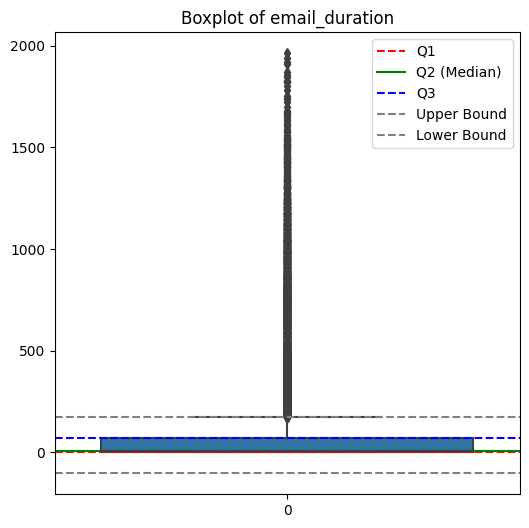

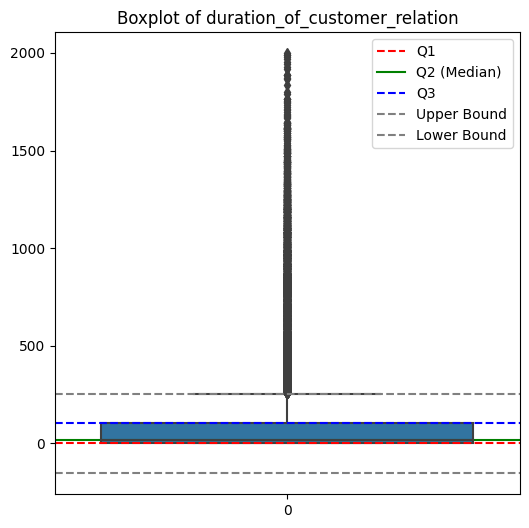

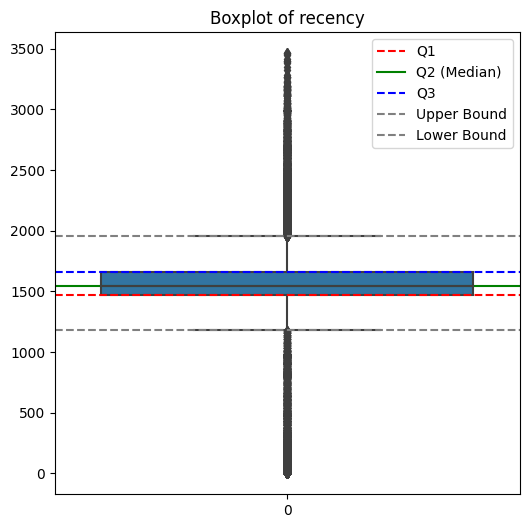

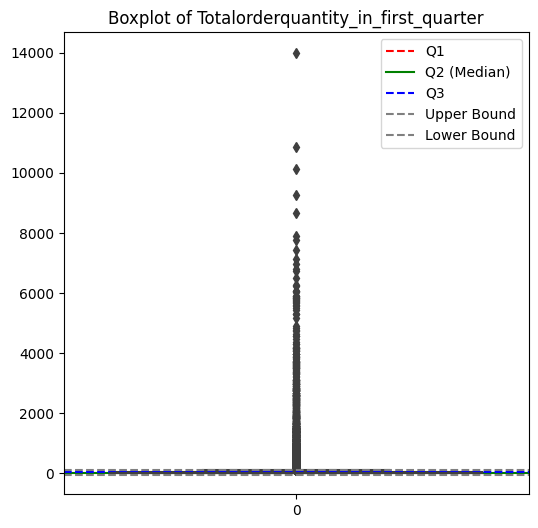

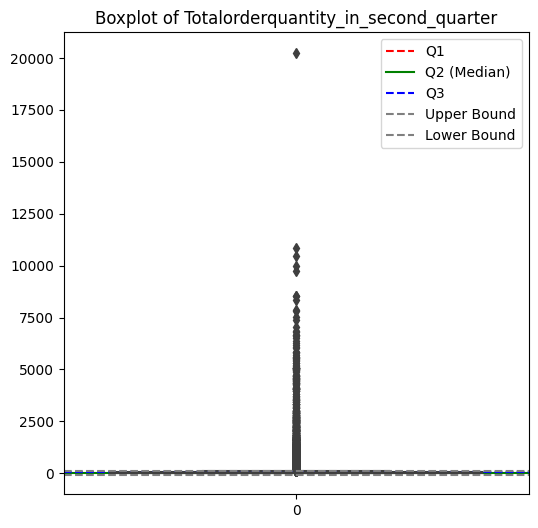

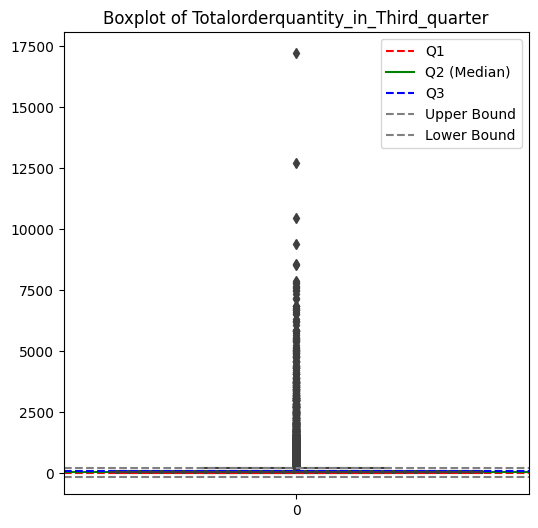

In [ ]:
for i in numericalcolumns:
  plt.figure(figsize=(6,6))
  sns.boxplot(train[i])
  plt.title("Boxplot of " + i)
  
  # calculate quartiles and upper/lower bounds
  q1 = train[i].quantile(0.25)
  q2 = train[i].quantile(0.5)
  q3 = train[i].quantile(0.75)
  iqr = q3 - q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  
  # mark quartiles and upper/lower bounds on the plot
  plt.axhline(q1, color='r', linestyle='--', label='Q1')
  plt.axhline(q2, color='g', linestyle='-', label='Q2 (Median)')
  plt.axhline(q3, color='b', linestyle='--', label='Q3')
  plt.axhline(upper, color='gray', linestyle='--', label='Upper Bound')
  plt.axhline(lower, color='gray', linestyle='--', label='Lower Bound')
  
  plt.legend()
  plt.show()


In [ ]:
#percentage of outliers present in each column
for i in numericalcolumns:
    
 IQR = (train[i]).quantile(0.75) - (train[i]).quantile(0.25)
 Upper_limit = (train[i]).quantile(0.75) + IQR*1.5
 lower_limit = (train[i]).quantile(0.25) - IQR*1.5
 print("|",i,"|",round(100.0 * len(train[(train[i])>Upper_limit])/len(train), 2)+round(100.0 * len(train[(train[i])<lower_limit])/len(train), 2))

| numofemails | 0.02
| average_time_between_mails | 28.23
| OrderQuantity | 5.8
| num_transactions | 12.09
| totalorders | 14.87
| minimumorderquantity | 6.57
| maximumorderquantity | 5.45
| average_time_between_purchase | 36.99
| averageorders | 6.05
| Totalmails-notoponed | 0.0
| Totalmails-oponed | 10.28
| timesclicked-yes | 0.01
| timesclicked-no | 16.17
| days_since_first_transaction | 17.11
| email_duration | 15.58
| duration_of_customer_relation | 14.95
| recency | 34.28
| Totalorderquantity_in_first_quarter | 14.8
| Totalorderquantity_in_second_quarter | 13.34
| Totalorderquantity_in_Third_quarter | 12.15


#Visualizations without target variable


1)Analysis of customers city wise
---



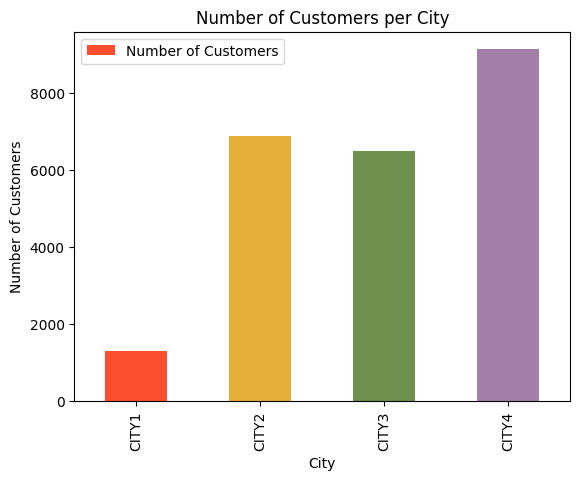

In [ ]:
grouped_data = train.groupby("City").size().reset_index(name="Number of Customers")
import matplotlib.pyplot as plt
# define colors for each bar
colors = ['#fc4f30', '#e5ae37', '#6d904f', '#a27ea8']
# plot bar chart
grouped_data.plot(kind='bar', x='City', y='Number of Customers',color=colors)
# set chart title and axis labels
plt.title('Number of Customers per City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
# show plot
plt.show()

**For city 1 if we see number of customers per city are far too less compared to city 2,city3 and city4,from this we can draw out few conclusions which might or might not be true**

1)More the no. of customers,there more the focus should be as there is higher potenial for customer retention,further analysis might reveal,status of retention potenial in those cities.

2)lesser the customers more marketing and schemes should be devloped there such that more customers are introduced.


In [ ]:
# group the data by city and retention potenial, and count the number of customers for each city
counts = train.groupby(['City','RetentionPotential']).size().reset_index(name="Number of Customers")
counts

City RetentionPotential  Number of Customers
0   CITY1               High                  125
1   CITY1                Low                 1155
2   CITY1             Medium                   28
3   CITY2               High                 1257
4   CITY2                Low                 5168
5   CITY2             Medium                  454
6   CITY3               High                  866
7   CITY3                Low                 5503
8   CITY3             Medium                  121
9   CITY4               High                 1508
10  CITY4                Low                 7359
11  CITY4             Medium                  276

**1)If we observe here city 2 has highest number of customers with medium retention potenial,so here we should not lose those customers aas they are valuable for our analysis**

---

**2)City 4 is having 7359 customers with low retention potenial.Their risk of churning is very higher compared to other cities.so,reaccesment should take place such that churning do not happen**



In [ ]:
# Group the data by city and calculate the total orders by that city customers,number of transactions did by that city customers, and comparing number of transactions each quarter
data2 = train.groupby('City').agg({'CustomerID':'count','totalorders':['sum','mean'],'num_transactions':'sum','Totalorderquantity_in_first_quarter':'sum','Totalorderquantity_in_second_quarter':'sum','Totalorderquantity_in_Third_quarter':'sum'})
data2.head()

CustomerID totalorders             num_transactions  \
           count         sum        mean              sum   
City                                                        
CITY1       1308      261920  200.244648             3632   
CITY2       6879     4380420  636.781509            48860   
CITY3       6490     1098124  169.202465            15700   
CITY4       9143     2778114  303.851471            36563   

      Totalorderquantity_in_first_quarter  \
                                      sum   
City                                        
CITY1                               52923   
CITY2                             1296802   
CITY3                              234813   
CITY4                              705980   

      Totalorderquantity_in_second_quarter Totalorderquantity_in_Third_quarter  
                                       sum                                 sum  
City                                                                            
CITY1                                70081                              138916  
CITY2                              1439515                             1644103  
CITY3                               222573                              640738  
CITY4                               877009                             1195125

**1)From the groupby operation we had done above we can find that city 2 is having 6879 customers but they are having large ammount of customers who had ordered so much with total orders and num of transactions summing upto 4380420 orders in 48860 transactions,with order quantity in each quarter growing up.Also we have a clear evidence from the plot above this that there are nearly 1700 customers who has retention potenial of high and medium.So customers from city 2 would add great value to our analysis.**

**2)Similarly for city 4,if we observe from our previous plot we can see that risk of churning is higher in city 4 was higher compared to others,but customer with retention potenial of medium and high are also more,if we number of orders and number of transactions were second highest to other cities,and quarter wise its been improving**

**3)Average order value from city1 is higher than city3 and there are less customers in city 1 compared to others,and city 3 has lesser orderquantity during  2nd quarter of a year**

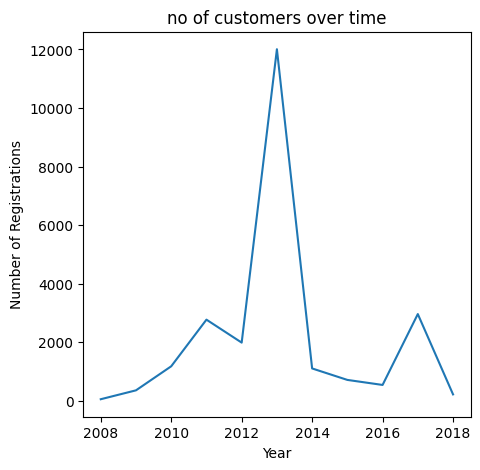

In [ ]:
#checking number of customers registered over years
plt.figure(figsize=(5,5))
train['DateOfRegistration'] = pd.to_datetime(train['DateOfRegistration'])
train['RegistrationYear'] = train['DateOfRegistration'].dt.year
yearly_registrations = train.groupby('RegistrationYear').count()['CustomerID']
plt.plot(yearly_registrations.index, yearly_registrations.values)
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('no of customers over time')
plt.show()


In [ ]:
yearly_registrations

RegistrationYear
2008       45
2009      349
2010     1171
2011     2765
2012     1980
2013    12009
2014     1097
2015      705
2016      533
2017     2956
2018      210
Name: CustomerID, dtype: int64

Till 2013 customers registrations,customers acquired exponentially,but after 2013 suddenly registration were dropped,and in 2016 again it increased and then dropped. 
Here we have to find out the reason why in year 2013, no. of registrations were dropped.


2)checking correlation between few of numerical columns
---



<Axes: >

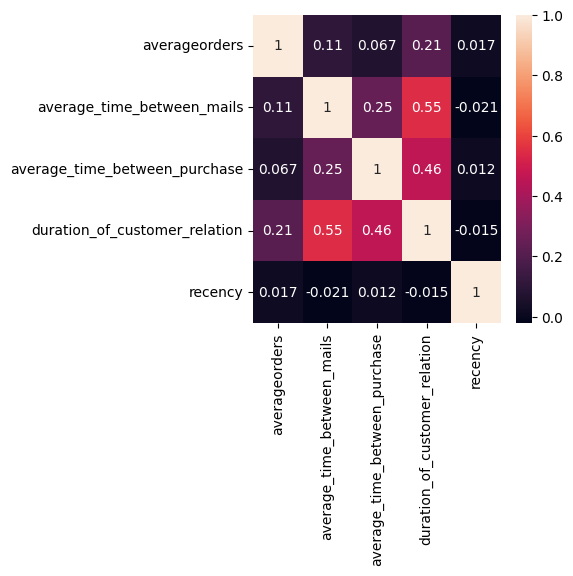

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(train[['averageorders','average_time_between_mails',
  'average_time_between_purchase',                 
 'duration_of_customer_relation',
 'recency']].corr(),annot=True)



```
**1)If we observe average_time_between_mails has positive correlation between duration_of_customer_relation**
**2)recency have no correlation at all with any of the columns**
**3)If we observe average_time_between_purchases has positive correlation between duration_of_customer_relation**

```





##3)**email** duration category with mail oponed




In [ ]:
import plotly.express as px

In [ ]:
#lets compare email duration category with mail oponed with yes or no
fig = px.histogram(train, x="MailOpened", color="email_duration_category",barmode="group",  title="<b>email duration w.r.t mail oponed</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

points to be noted:-

1)On their last email,if we see only 1382 customers with very long email history has oponed mail while 3578 customers has not oponed their mails.

**2)people who have received only mail,880 customers had not even oponed the mail.people who received only mail are people with welcome mails,we can understand that 880 customers were not intrested as they had not oponed.**

3)544 Customers with medium history has oponed while 1336 has not oponed the mail.

4)4277 customers with long mail history has not oponed the mail while 1749 customers has not oponed..

Keypoint-**2)people who have received only mail,880 customers had not even oponed the mail.people who received only mail are people with welcome mails,we can understand that 880 customers were not intrested as they had not oponed.**


###b)OnlineCommunication category with days_since_first_transaction_category 

In [ ]:
#lets compare OnlineCommunication category with days_since_first_transaction_category 
fig = px.histogram(train, x="OnlineCommunication", color="days_since_first_transaction_category",barmode="group",  title="<b>OnlineCommunication category with days_since_first_transaction_category </b>")
fig.update_layout(width=700, height=300, bargap=0.1)
fig.show()

**1)Only transaction:-Customers prefer online communication more**

**2)Longtermhistory:-lesser Customers prefer online communication.**

**3)ModerateHistory:-Customers prefer online communication more.**

**4)RecentTransactions:-Customers prefered online communication more**


Keypoint-customers with long term history are lesser likely to have online communication

###c)days_since_first_transaction_category w.r.t RetentionPotential

In [ ]:
#lets compare email duration category with mail oponed with yes or no
fig = px.histogram(train, x="days_since_first_transaction_category", color="RetentionPotential",barmode="group",  title="<b>city w.r.t PreferredDeliveryDay</b>")
fig.update_layout(width=700, height=300, bargap=0.1)
fig.show()

Customers with moderate history,long term history have few customers with medium retention possibilty.this would be useful for our analysis as our focus is on customers with medium retention potenial because if we can concentrate on them we can improve our business,as they had already been customer since so much time we have to plan something for them such that they would remain loyal customers.

##4)Lets try to understand how minimum and maximum order columns of a customer will help us to understand his/her purchase behaviour?

In [ ]:
train[["minimumorderquantity","maximumorderquantity","averageorders"]].describe()

minimumorderquantity  maximumorderquantity  averageorders
count          23820.000000          23820.000000   23820.000000
mean              58.586608             65.653778      61.931444
std               36.428571             41.270385      38.318825
min                0.000000              0.000000       0.000000
25%               40.000000             41.000000      41.000000
50%               48.000000             53.000000      51.000000
75%               69.000000             80.000000      74.000000
max             1501.000000           1501.000000    1501.000000

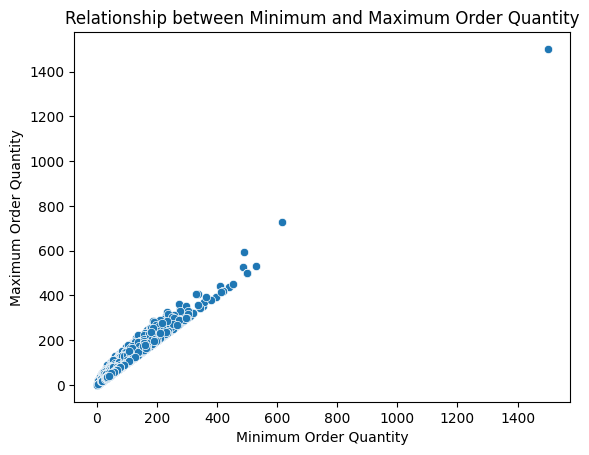

In [ ]:
sns.scatterplot(x=train['minimumorderquantity'], y=train['maximumorderquantity'])
plt.xlabel('Minimum Order Quantity')
plt.ylabel('Maximum Order Quantity')
plt.title('Relationship between Minimum and Maximum Order Quantity')
plt.show()
#there is a linear relationship between minimum and maximum order quantity,as it is reduntant column we can consider removing them.

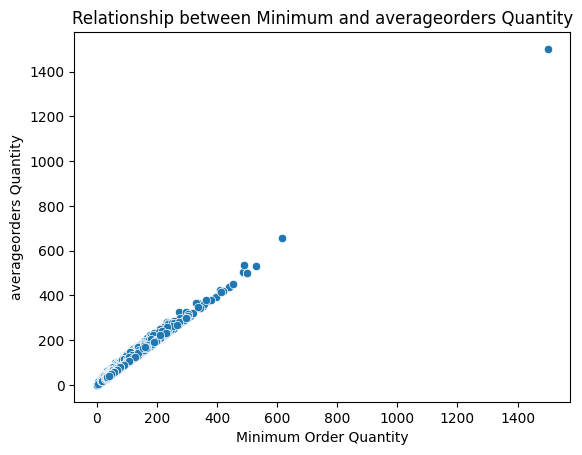

In [ ]:
sns.scatterplot(x=train['minimumorderquantity'], y=train['averageorders'])
plt.xlabel('Minimum Order Quantity')
plt.ylabel('averageorders Quantity')
plt.title('Relationship between Minimum and averageorders Quantity')
plt.show()
#there is a linear relationship between minimum and average order quantity,as it is reduntant column we can consider removing them.

In [ ]:
# Identify most profitable customers
profitable_customers = train[train['averageorders'] > 100].reset_index()
# Optimize inventory management
large_order_customers = train[train['averageorders'] > 50]
small_order_customers = train[train['averageorders'] <= 50]
# Improve customer experience based on order quantity
train['customer_segment'] = train.apply(lambda row: 'large_order_customer' if row['OrderQuantity'] > 50 else 'small_order_customer', axis=1)
train['customer_segment']=train['customer_segment'].astype("category")

In [ ]:
train['customer_segment']=train['customer_segment'].astype("category")

# Key visualizations with respect to target variable.

In [ ]:
#Checking imbalance in data
# Finding % of customers with retention potential of high,low,medium.

target_high_percentage = (round (len(train.query('RetentionPotential=="High"'))/len(train),3)) * 100
print ("target_high_percentage:", target_high_percentage,"%")

target_Medium_percentage = (round (len(train.query('RetentionPotential=="Medium"'))/len(train),3)) * 100
print ("target_Medium_percentage:", target_Medium_percentage,"%")

target_Low_percentage = (round (len(train.query('RetentionPotential=="Low"'))/len(train),4)) * 100
print ("target_Low_percentage:", target_Low_percentage,"%")


target_high_percentage: 15.8 %
target_Medium_percentage: 3.6999999999999997 %
target_Low_percentage: 80.54 %


**if we can see there is high imbalance in the data.Target low percentage is very high in proportion,while target medium percentage and target high are very low**

Creation of three data sets - one for each high,medium and low

In [ ]:
# Creating Dataframe of the retention potenial with high customers  
high= train.query('RetentionPotential=="High"')
# Creating Dataframe of the retention potenial with low customers 
low= train.query('RetentionPotential=="Low"')
# Creating Dataframe of the retention potenial with medium customers 
medium= train.query('RetentionPotential=="Medium"')


In [ ]:
catcolanalysis=['OnlineCommunication','AutomaticRefill','DoorstepDelivery','MailOpened','MailClicked','days_since_first_transaction_category','email_duration_category','customer_segment']

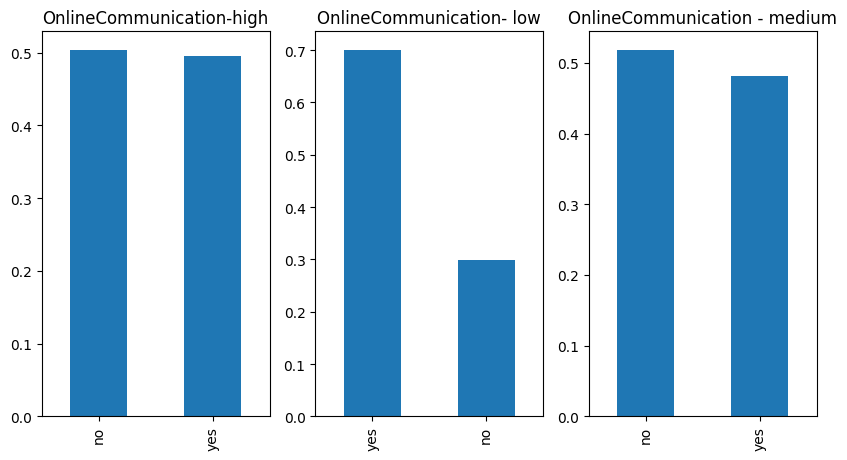

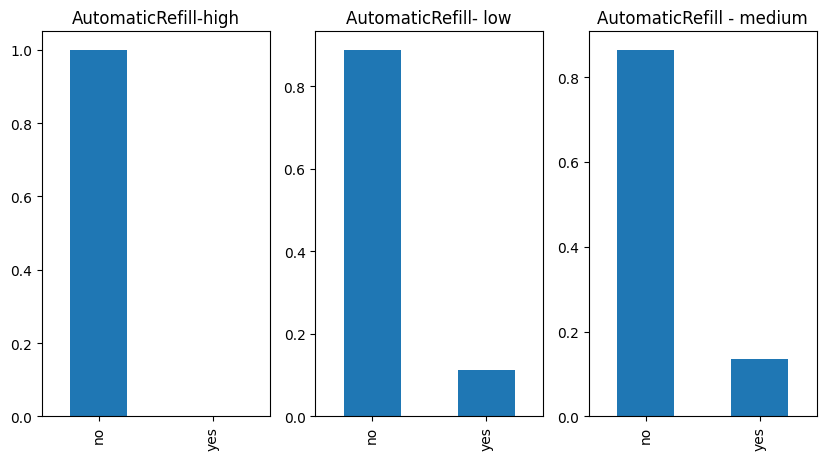

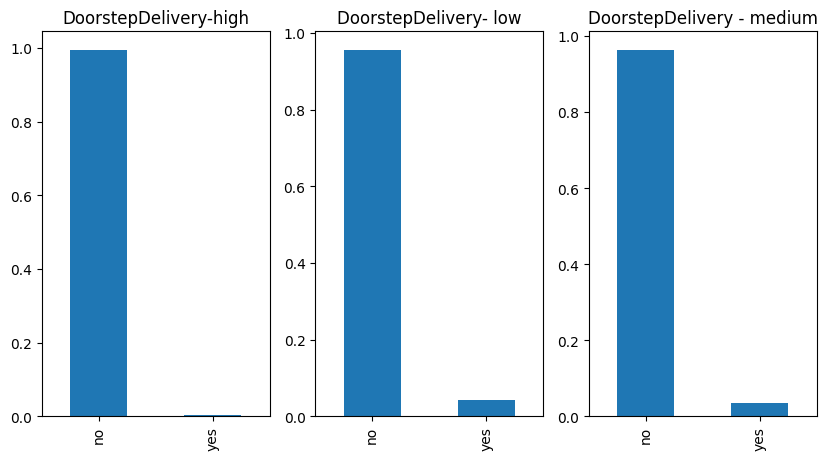

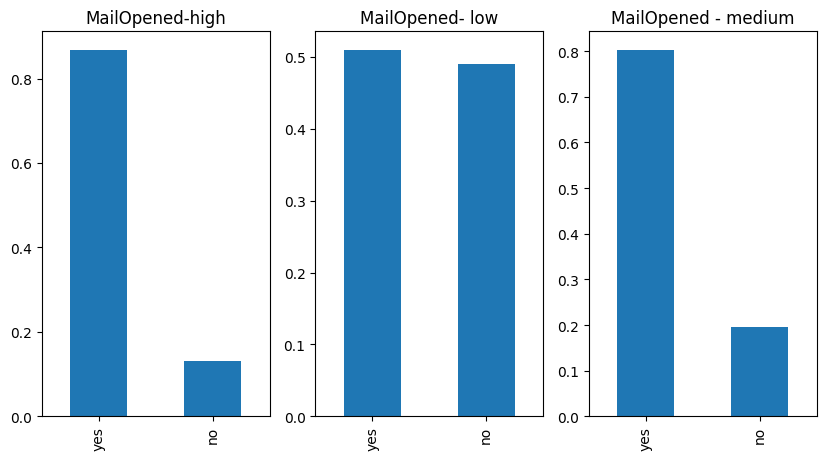

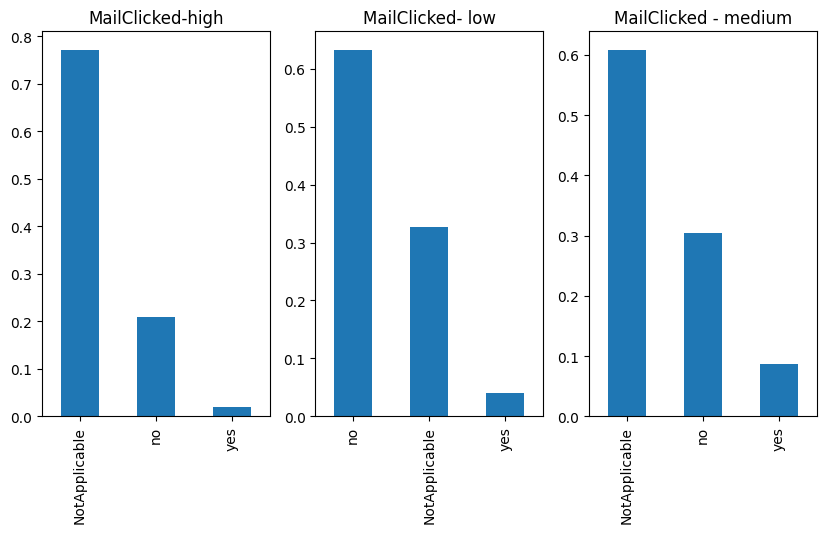

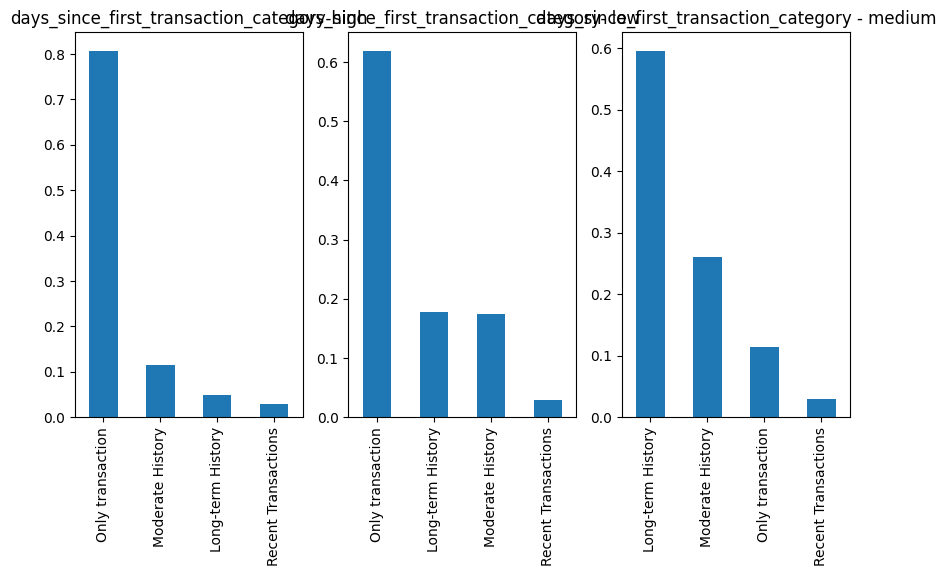

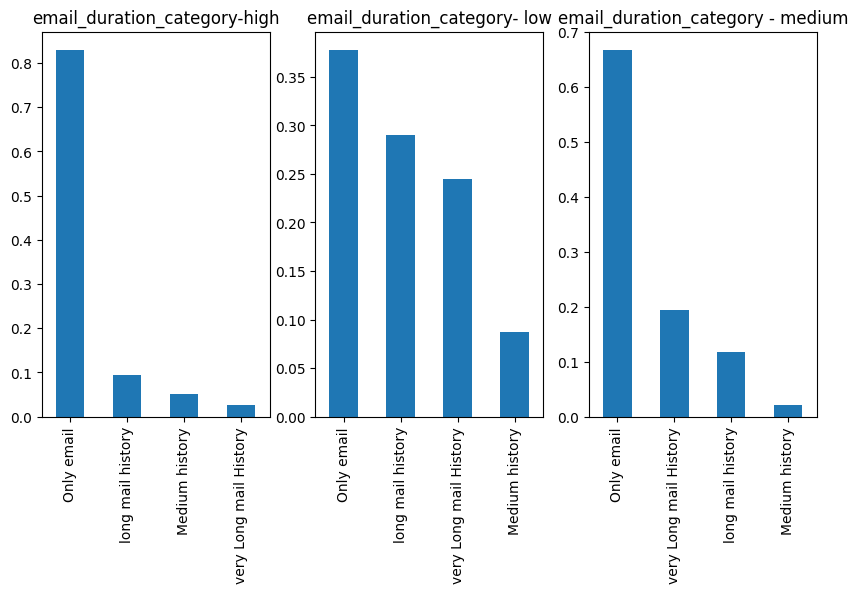

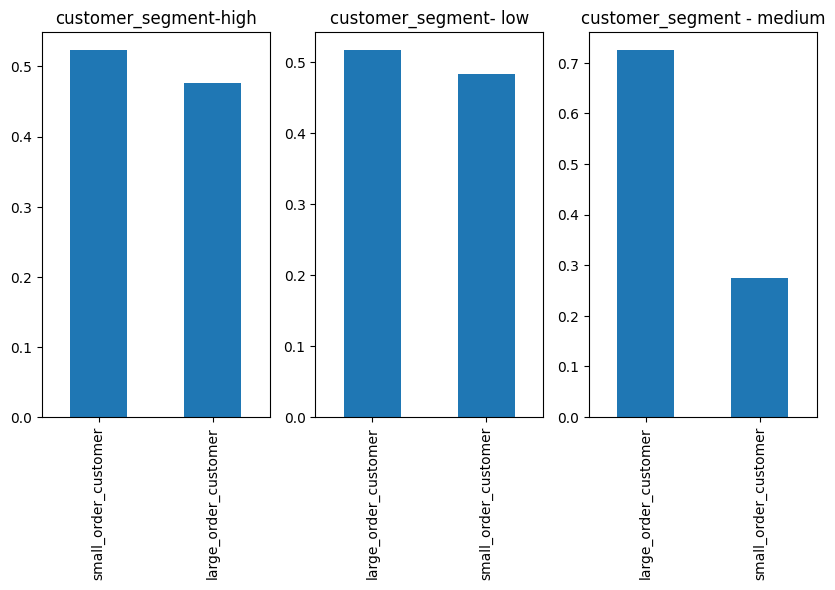

In [ ]:
#loop for performing univariate analysis
for i in catcolanalysis:
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    high[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '-high')
    plt.subplot(1,3,2)
    low[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- low')
    plt.subplot(1,3,3)
    medium[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ ' - medium')

**Understandings from the above plot:-**

1.  Online communication -Medium(target=retentionpotenial(medium) have a lesser percentage of customers who are preferring online communication
2. Automatic refill -High(target=retentionpotenial(high)) has not at all preffered to have automatic refill.
3. Doorstep delivery - customers across all the targets had the same ammount of preference,most of them wanted to have doorstep delivery.
4. Mail oponed -Low(target=retentionpotenial(low) has compartively higher percentage of customers not opening the mail.
5. Mail clicked-medium (target=retentionpotenial(medium) has clicked the mail most than the others.
6. days_since_first_transaction category:-
   a)only transaction:-customers with higher chances of retention are more.
   b)moderate history:-Customers with medium chances of retention are higher.
   c)Long-term history:-Customers with medium chances of retention are higher.
   d)Recent -transaction :-customers were nearly equal across all the categories of retention potenial.
7. Email_duration_category:-
   a)Only email:-High(retentionpotenial(high) has more no of customers with only email sent
   b)Long mail history:-LOW(retentionpotenial(low)) had more no of customers with long mail history.
   c)very long mail history:LOW(retentionpotenial(low)) had more no of customers with very long mail history.
   d)medium history:-it is mostly same across all the graphs. 
8. Customersegment:-if we observe here large order customers are more than the small order customers for    
retention potenial-medium customers




the time elapsed since the customer's last transaction.The resulting values will be a measure of the duration of time since each customer's last transaction

<Axes: xlabel='days_since_first_transaction_category', ylabel='recency'>

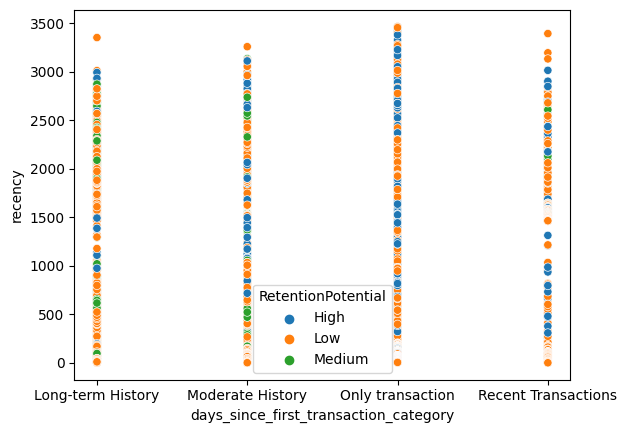

In [ ]:
#lets check transaction category w.r.t how recent a customer has been and segregating it by using hue as retention potenial.
sns.scatterplot(x=train["days_since_first_transaction_category"],y=train["recency"],hue=train["RetentionPotential"])

**1)Customers with long term history,moderate history and there recenct transaction between 0 and 500 days, we can see there are few customers whose retention potenial is medium**


**2)Customers with moderate history and there recency between 2500 and 3000 days,has also a fewer customers with medium possibility of retention.**

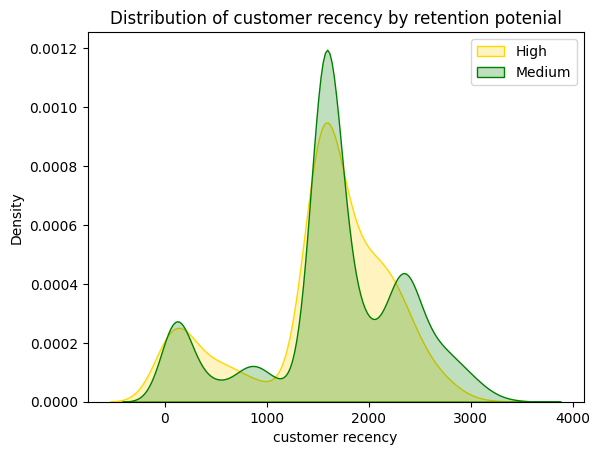

In [ ]:
#
ax = sns.kdeplot(train.recency[(train["RetentionPotential"] == 'Medium') ],
                color="Gold", shade = True);
ax = sns.kdeplot(train.recency[(train["RetentionPotential"] == 'High') ],
                ax =ax, color="Green", shade= True);
               
ax.legend(["High","Medium"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('customer recency');
ax.set_title('Distribution of customer recency by retention potenial');

**it shows the relative frequency of observations in each range of customer recency.**


1)0-1000 days-for target-high there are more no. of customers present


2)1000-4000 days - they are not that active customers but still they can be retained but if we observe medium customers are more,there might be a chance of them churning.

#Order quantities by registration every year

In [ ]:
for i in range(2008,2019,2):
   t=train[train["RegistrationYear"]==i]
   fig = px.pie(t, values='OrderQuantity', names='RetentionPotential', title=f'order quantity every year w.r.t to registration year {i}')
   fig.show()

Here we are comparing order quantities by no. of registrations every 2 years.
2008-


#Interaction of customers w.r.t company and to identify which services are most popular and how to capitalize on them based on their prefrences.

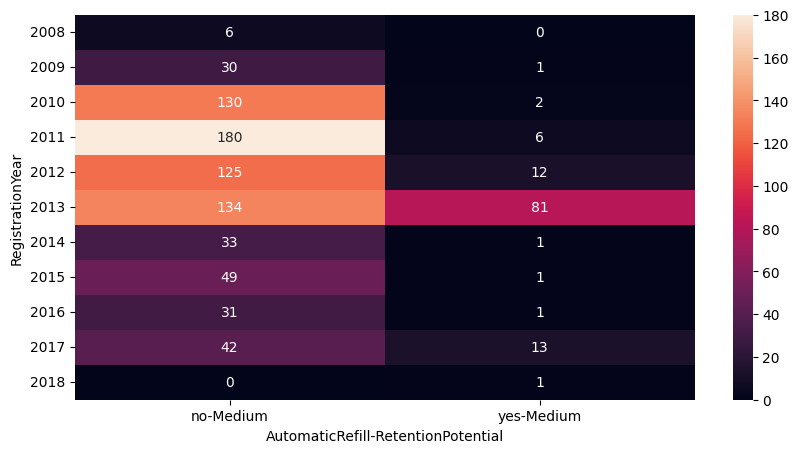

In [ ]:
# create a cross-tabulation table to count the number of cases
ct = pd.crosstab(index=medium['RegistrationYear'],
                 columns=[medium['AutomaticRefill'],medium['RetentionPotential']])

# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()

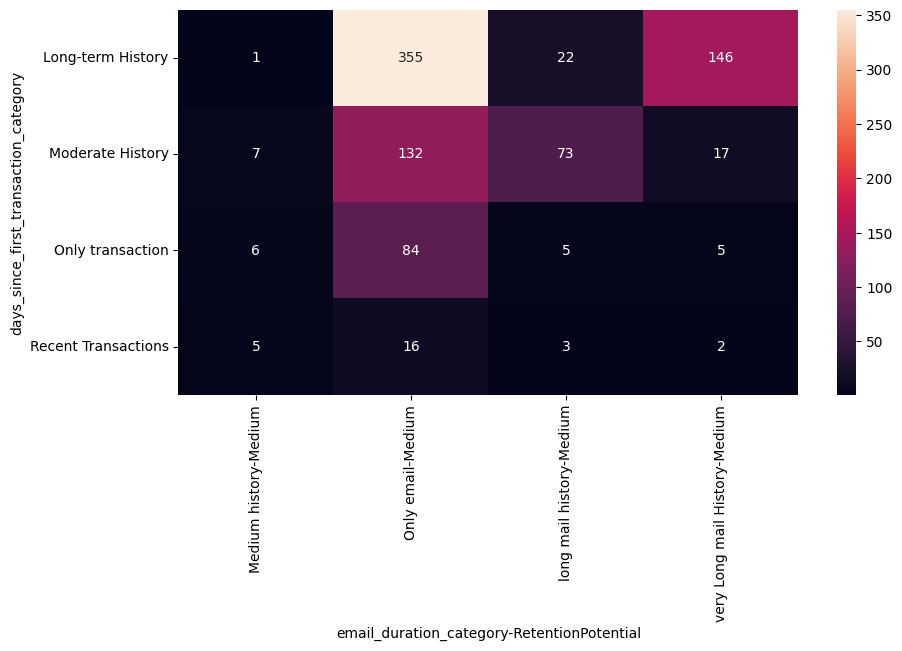

In [ ]:
# create a cross-tabulation table to count the number of cases
ct = pd.crosstab(index=medium['days_since_first_transaction_category'],
                 columns=[medium['email_duration_category'],medium['RetentionPotential']])

# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()

*There are 355 medium retention potenial customers with long term transaction history  and only mail being sent to them.* 


*Customers with medium retention potenial and long term transaction history are compartively more than the others,so we can target this customers and prevent them from churning*

#Feature Engineering.

In [ ]:
train["Time_to_First_Email"]=(train["first_transaction_date"]-train["firstemailDatetime"]).dt.days
train["Time_to_First_Email"]=train["Time_to_First_Email"].astype("int")
train["Time_since_Last_Email"]=(train["last_transaction_date"]-train["lastemailDatetime"]).dt.days
train["Time_since_Last_Email"]=train["Time_since_Last_Email"].astype("int")

In [ ]:
train.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'RetentionPotential', 'EmailType', 'MailOpened', 'MailClicked',
       'emailDatetime', 'numofemails', 'lastemailDatetime',
       'firstemailDatetime', 'average_time_between_mails', 'OrderQuantity',
       'last_transaction_date', 'num_transactions', 'totalorders',
       'minimumorderquantity', 'maximumorderquantity',
       'first_transaction_date', 'average_time_between_purchase',
       'averageorders', 'Totalmails-notoponed', 'Totalmails-oponed',
       'timesclicked-yes', 'timesclicked-no', 'days_since_first_transaction',
       'email_duration', 'duration_of_customer_relation', 'recency',
       'days_since_first_transaction_category', 'email_duration_category',
       'Totalorderquantity_in_first_quarter',
       'Totalorderquantity_in_second_quarter',
       'Totalorderquantity_in_Third_quarter', 'RegistrationYear',
       'cus

In [ ]:
sns.scatterplot

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

#Customer-segmentation



RFM Segmentation: This approach segments customers based on their recency, frequency, and monetary value of their transactions. You already have some features related to transaction history, such as last_transaction_date, num_transactions, and OrderQuantity, which could be used to calculate these metrics. RFM segmentation can be helpful for identifying high-value customers, loyal customers, and customers who may be at risk of churn.

Behavioral Segmentation: This approach segments customers based on their behaviors and preferences, such as their preferred delivery day, online communication preferences, and response to email campaigns (MailOpened, MailClicked). You could also use features related to customer retention potential, such as RetentionPotential, to identify customer segments that are likely to require special attention or retention strategies.


Hybrid Segmentation: You could also combine multiple segmentation approaches to create a more comprehensive view of customer behavior and preferences. For example, you could combine RFM and Behavioral segmentation to identify high-value customers who are also responsive to email campaigns, or combine Behavioral and Demographic segmentation to identify customer segments with similar behavior and demographic characteristics.


##**1)RFMSEGMENTATION**

In [ ]:
#rfmsegmentation
#lets segment our customers bases upon their transaction records
#if we observe our last transaction was on date 2018-01-21
transaction["DateOfOrder"].describe()


count                  104755
unique                   3151
top       2014-01-13 00:00:00
freq                      310
first     2008-07-29 00:00:00
last      2018-01-21 00:00:00
Name: DateOfOrder, dtype: object

In [ ]:
#lets check days since first transaction for each record then we will figure out accordingly.
transaction['days_since'] =  pd.to_datetime(transaction['DateOfOrder']).apply(lambda x: (pd.to_datetime("2018-01-21") - x).days)

In [ ]:
## Compute recency, frequency, and monetary_value
def rec_freq_value(x):
    recency        = x['days_since'].min()#how recently a customer was active
    first_purchase = x['days_since'].max()#out off all the days,the max difference is the first purchase he had made
    frequency      = x['days_since'].count()#how many times a customer had transacted between his first and last
    order_value = x['OrderQuantity'].mean()#how much quantity he had ordered,average of the total orders he had ordered
    c = ['recency', 'first_purchase', 'frequency', 'order_value']
    return pd.Series([recency, first_purchase, frequency, order_value], index = c)

In [ ]:
#applying the function on my whole records
customer_purchases = transaction.groupby('CustomerID').apply(rec_freq_value)


**kmeans clustering:-partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid)**

In [ ]:
#customer_purchases

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(customer_purchases)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = customer_purchases.index, columns = customer_purchases.columns)

why we scaled data here?
it is essential step in clustering,as we have to bring all the columns onto same scale.

In [ ]:
#Scaled_Data

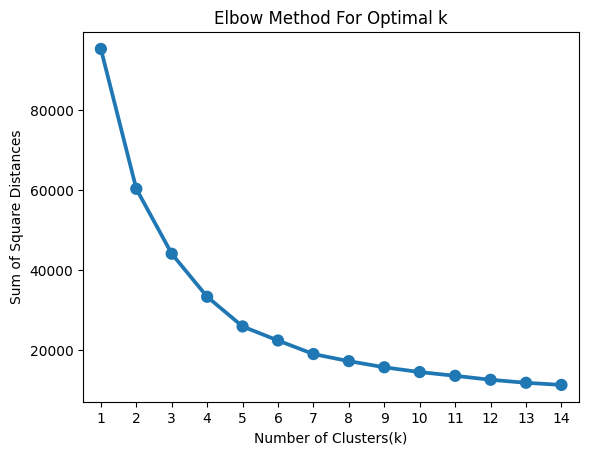

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

*AT k=5 it starts decreasing so here we will pick k as optimum no for our cluster*

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
customer_purchases['Cluster'] = KMean_clust.labels_
customer_purchases.head()

recency  first_purchase  frequency  order_value  Cluster
CustomerID                                                          
C12116       1564.0          1571.0        3.0    38.333333        2
C12117       1508.0          1508.0        1.0    41.000000        2
C12118       1594.0          1594.0        1.0    41.000000        2
C12119       1552.0          1552.0        1.0    52.000000        2
C12120       1472.0          1472.0        1.0    31.000000        2

In [ ]:
#customer_purchases['Cluster'].value_counts()

<Figure size 700x700 with 0 Axes>

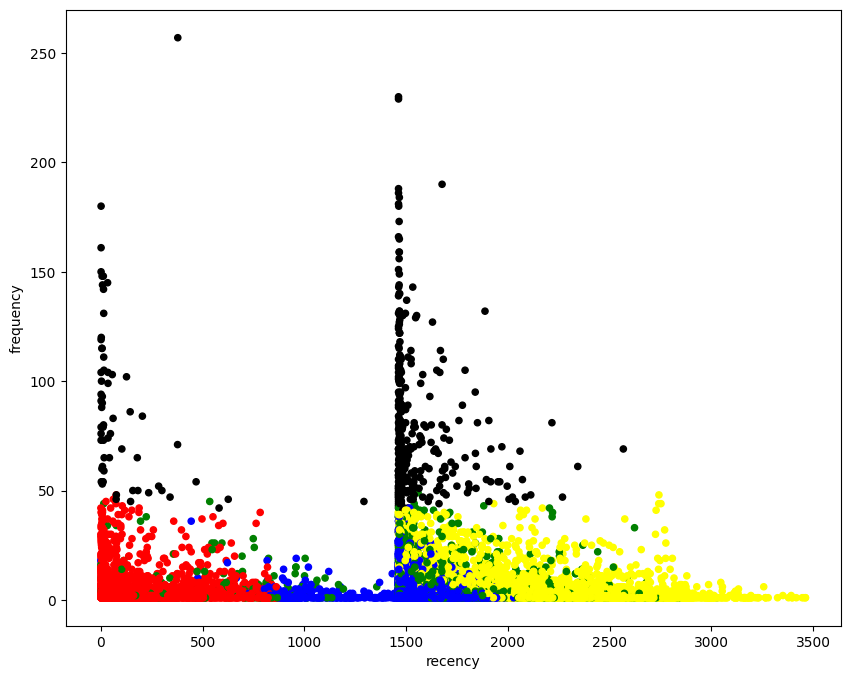

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black","yellow"]
customer_purchases['Color'] = customer_purchases['Cluster'].map(lambda p: Colors[p])
ax = customer_purchases.plot(    
    kind="scatter", 
    x="recency", y="frequency",
    figsize=(10,8),
    c = customer_purchases['Color']
)

In [ ]:
customer_purchases['Color'].value_counts()

blue      13121
red        4168
yellow     3994
green      2130
black       407
Name: Color, dtype: int64

In [ ]:
customer_purchases['Cluster'].value_counts()

2    13121
0     4168
4     3994
1     2130
3      407
Name: Cluster, dtype: int64

In [ ]:
customer_purchases['Cluster Name'] = ''
customer_purchases['Cluster Name'][customer_purchases['Cluster']==0] = 'lessfrequent-midrecency'
customer_purchases['Cluster Name'][customer_purchases['Cluster']==1] = 'higherfrequency'
customer_purchases['Cluster Name'][customer_purchases['Cluster']==2] = 'lessfrequent,lessrecency'
customer_purchases['Cluster Name'][customer_purchases['Cluster']==3] = 'lessfrequent-higherrecency'
customer_purchases['Cluster Name'][customer_purchases['Cluster']==4] = 'lesserfrequent'



In [ ]:
#customer_purchases

**These are the categories we had obtained from RFM segmentation,but we cant solely base upon,so lets check RFM segmentation along with Customer email behaviour**

##**2)RFM SEGMENTATION WITH CUSTOMER EMAIL BEHAVIOUR**

In [ ]:
RFM=transaction.groupby('CustomerID').apply(rec_freq_value)


In [ ]:
#lets combine email behaviour with rfm 
emailresponses=train[['CustomerID','Totalmails-notoponed', 'Totalmails-oponed', 'timesclicked-yes', 'timesclicked-no','numofemails']]

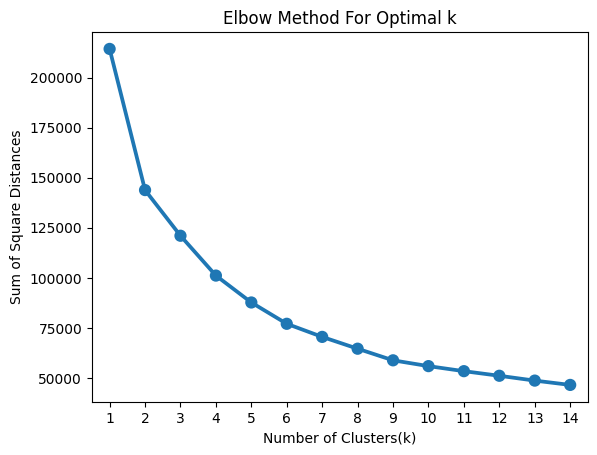

In [ ]:
#rfm with email responsive
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Combine RFM scores and email response data
# Combine RFM scores and email response data
rfm_email = pd.merge(RFM,emailresponses, on=["CustomerID"])
rfm_email=rfm_email.drop(["CustomerID"],axis=1)

# Normalize the RFM scores and email response data
rfm_email_norm = (rfm_email - rfm_email.mean()) / rfm_email.std()
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(rfm_email_norm)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(rfm_email_norm)

#Find the clusters for the observation given in the dataset
rfm_email['Cluster'] = KMean_clust.labels_
rfm_email.head()

recency  first_purchase  frequency  order_value  Totalmails-notoponed  \
0   1564.0          1571.0        3.0    38.333333                    27   
1   1508.0          1508.0        1.0    41.000000                     0   
2   1594.0          1594.0        1.0    41.000000                     0   
3   1552.0          1552.0        1.0    52.000000                    28   
4   1472.0          1472.0        1.0    31.000000                     0   

   Totalmails-oponed  timesclicked-yes  timesclicked-no  numofemails  Cluster  
0                  5                29                2           31        1  
1                  1                 0                0            1        0  
2                  1                 0                0            1        0  
3                 14                37                4           41        3  
4                  1                 0                0            1        0

<Figure size 700x700 with 0 Axes>

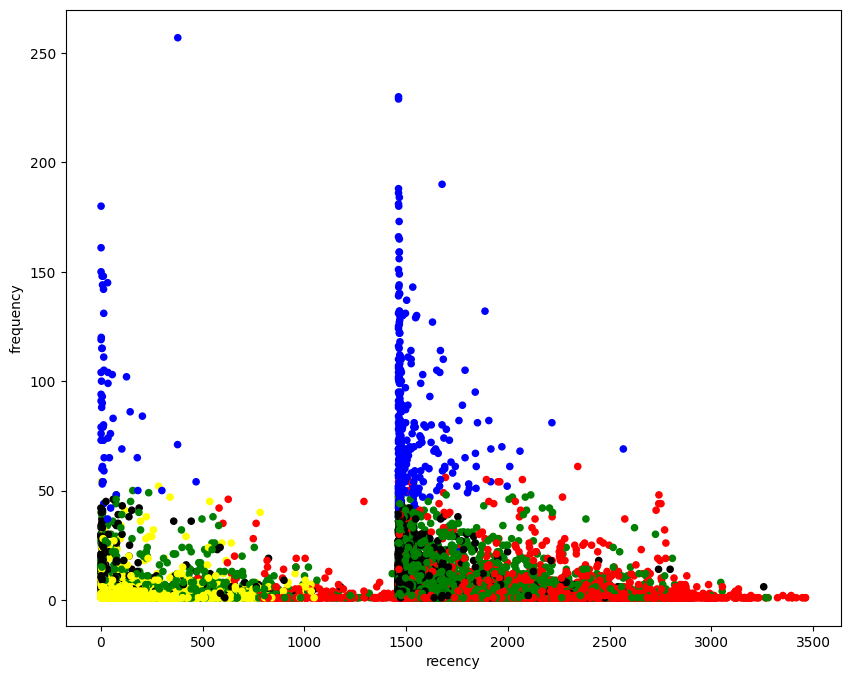

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black","yellow"]
rfm_email['Color'] = rfm_email['Cluster'].map(lambda p: Colors[p])
ax = rfm_email.plot(    
    kind="scatter", 
    x="recency", y="frequency",
    figsize=(10,8),
    c = rfm_email['Color']
)

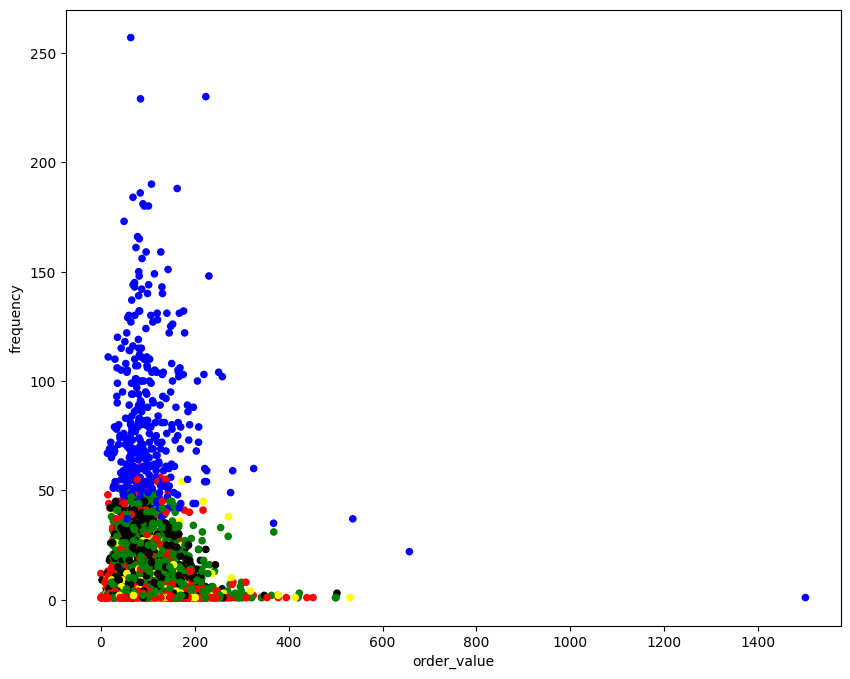

In [ ]:
ax = rfm_email.plot(    
    kind="scatter", 
    x="order_value", y="frequency",
    figsize=(10,8),
    c = rfm_email['Color']
)

In [ ]:
rfm_email['Cluster Name'] = ''
rfm_email['Cluster Name'][rfm_email['Cluster']==0] = 'midfrequency'
rfm_email['Cluster Name'][rfm_email['Cluster']==1] = 'Higherrecency-lessfrequent '
rfm_email['Cluster Name'][rfm_email['Cluster']==2] = 'recenttransactionswithlessfrequency'
rfm_email['Cluster Name'][rfm_email['Cluster']==3] = 'midfrequencywithrecenttransactionatintervals'
rfm_email['Cluster Name'][rfm_email['Cluster']==4] = 'higherfrequencyatdifferentintervals'

Assigning the segments we got from clustering analysis to main dataframe.

In [ ]:
train = train.reset_index().drop('index', axis=1)
train['Cluster Name'] = rfm_email['Cluster Name']
train['Cluster Name']=train['Cluster Name'].astype("category")

Lets now try building different models for our customer retention potenial.

In [ ]:
## Custom Function for Bar Plots

def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

In [ ]:
train[['totalorders','Totalorderquantity_in_first_quarter',
       'Totalorderquantity_in_second_quarter',
       'Totalorderquantity_in_Third_quarter']].describe()

totalorders  Totalorderquantity_in_first_quarter  \
count  23820.000000                         23820.000000   
mean     357.622922                            96.159446   
std     1335.649680                           417.061493   
min        0.000000                             0.000000   
25%       41.000000                             0.000000   
50%       65.000000                             0.000000   
75%      169.000000                            41.000000   
max    51429.000000                         13982.000000   

       Totalorderquantity_in_second_quarter  \
count                          23820.000000   
mean                             109.537280   
std                              472.822847   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                               52.000000   
max                            20228.000000   

       Totalorderquantity_in_Third_quarter  
count                         23820.000000  
mean                            151.926196  
std                             495.469196  
min                               0.000000  
25%                               0.000000  
50%                              41.000000  
75%                              93.000000  
max                           17219.000000

<Axes: >

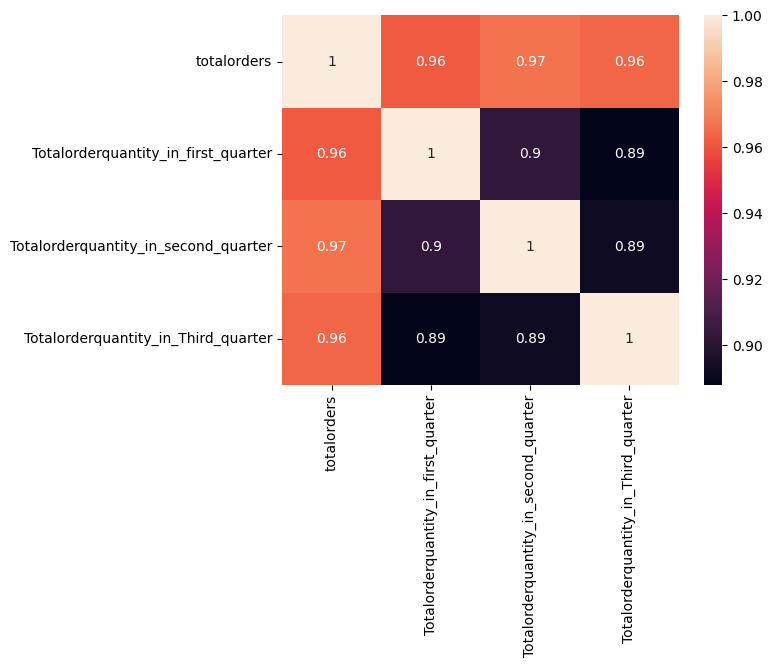

In [ ]:
sns.heatmap(train[['totalorders','Totalorderquantity_in_first_quarter',
       'Totalorderquantity_in_second_quarter',
       'Totalorderquantity_in_Third_quarter']].corr(),annot=True)

In [ ]:
# Loop over the rows of the dataframe and create a new column 'most_ordered_quarter'
for index, row in train.iterrows():
    if row['Totalorderquantity_in_first_quarter'] > row['Totalorderquantity_in_second_quarter'] and row['Totalorderquantity_in_first_quarter'] > row['Totalorderquantity_in_Third_quarter']:
        train.at[index, 'most_ordered_quarter'] = 'Q1'
    elif row['Totalorderquantity_in_second_quarter'] > row['Totalorderquantity_in_first_quarter'] and row['Totalorderquantity_in_second_quarter'] > row['Totalorderquantity_in_Third_quarter']:
        train.at[index, 'most_ordered_quarter'] = 'Q2'
    else:
        train.at[index, 'most_ordered_quarter'] = 'Q3'

In [ ]:
train['most_ordered_quarter']=train['most_ordered_quarter'].astype("category")

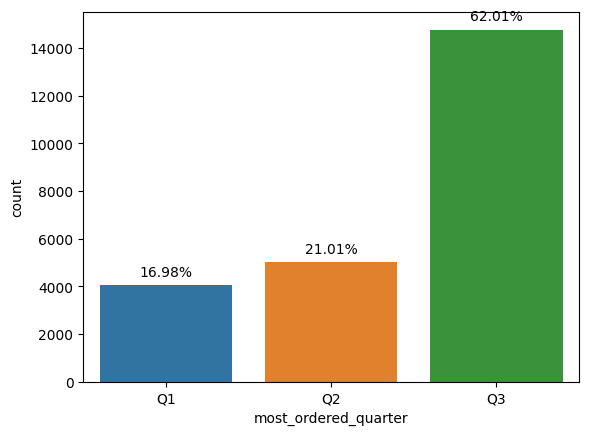

In [ ]:
barplot('most_ordered_quarter',train)

In [ ]:
cat_cols = train.select_dtypes('category').columns
cat_cols

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'RetentionPotential',
       'EmailType', 'MailOpened', 'MailClicked',
       'days_since_first_transaction_category', 'email_duration_category',
       'customer_segment', 'Cluster Name', 'most_ordered_quarter'],
      dtype='object')

In [ ]:
def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [ ]:
for col in cat_cols:
    find_chi2_independence(col, 'RetentionPotential', train)

---------------RetentionPotential Vs CustomerID Chi Square Test of Independence -------------------

 Contingency table :

[[0 0 1 ... 1 0 0]
 [1 1 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]]

 Expected table :

[[0.15768262 0.15768262 0.15768262 ... 0.15768262 0.15768262 0.15768262]
 [0.80541562 0.80541562 0.80541562 ... 0.80541562 0.80541562 0.80541562]
 [0.03690176 0.03690176 0.03690176 ... 0.03690176 0.03690176 0.03690176]]
The p value returned = 0.4965535116908812 and degrees of freedom returned = 47638
significance(alpha) = 0.050
Independent (fail to reject H0)
---------------RetentionPotential Vs City Chi Square Test of Independence -------------------

 Contingency table :

[[ 125 1257  866 1508]
 [1155 5168 5503 7359]
 [  28  454  121  276]]

 Expected table :

[[ 206.2488665  1084.69874055 1023.36020151 1441.69219144]
 [1053.4836272  5540.45403023 5227.14735516 7363.91498741]
 [  48.2675063   253.84722922  239.49244332  337.39282116]]
The p value returned = 2.7318851965917284e-77 and de

In [ ]:
#clustername-we should remove this as it is not adding benifit to our analysis

In [ ]:
train=train.drop(['Cluster Name'],axis=1)

FEATURE ENGINEERING

In [ ]:
datetypecolumns

['DateOfRegistration',
 'emailDatetime',
 'lastemailDatetime',
 'firstemailDatetime',
 'last_transaction_date',
 'first_transaction_date']

In [ ]:
train['Registration_month']=train['DateOfRegistration'].dt.month
train['Registration_weekday']=train['DateOfRegistration'].dt.weekday
train['lastemail_month']=train['lastemailDatetime'].dt.month
train['lastemail_weekday']=train['lastemailDatetime'].dt.weekday
train['transaction_month']=train['last_transaction_date'].dt.month
train['transaction_weekday']=train['last_transaction_date'].dt.weekday
train=train.drop(["last_transaction_date","lastemailDatetime","DateOfRegistration"],axis=1)

In [ ]:
datetypecolumns
train=train.drop(['firstemailDatetime',"first_transaction_date","emailDatetime"],axis=1)

In [ ]:
for col in ['Registration_month',
       'Registration_weekday', 'lastemail_month', 'lastemail_weekday',
       'transaction_month', 'transaction_weekday']:
   train[col] =train[col].astype('category')

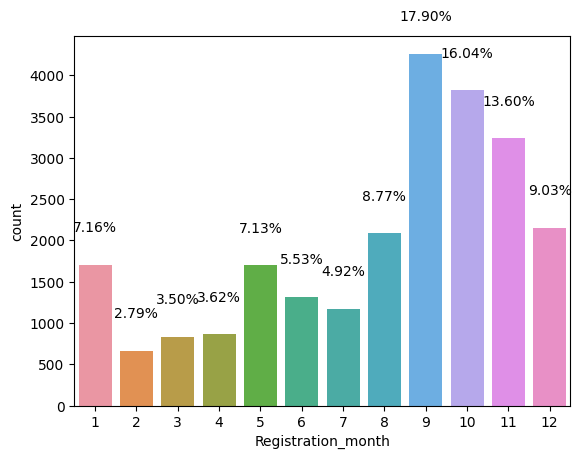

In [ ]:
barplot('Registration_month',train)


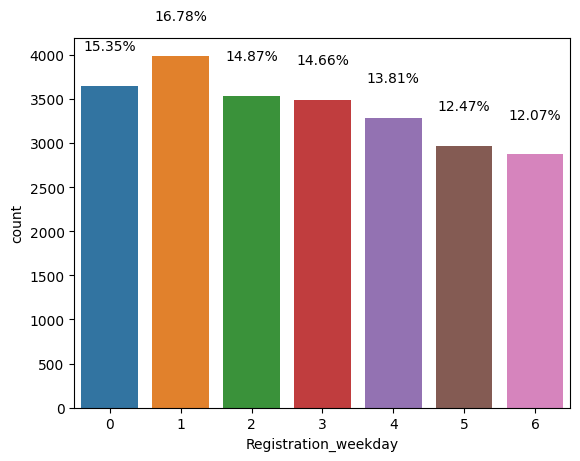

In [ ]:
barplot('Registration_weekday',train)

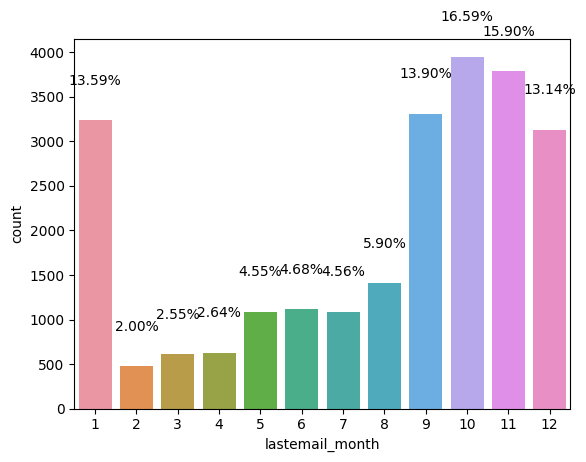

In [ ]:
barplot('lastemail_month',train)

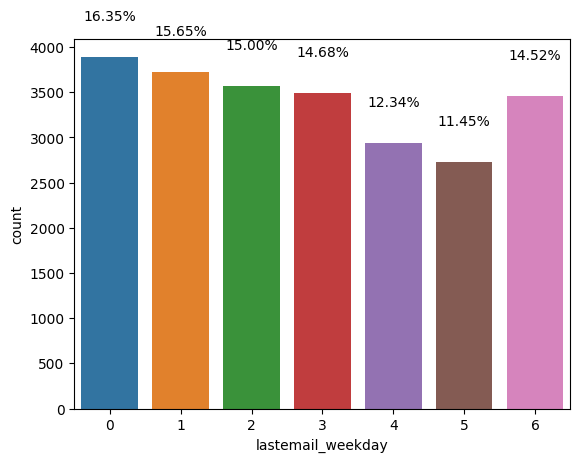

In [ ]:
barplot('lastemail_weekday',train)

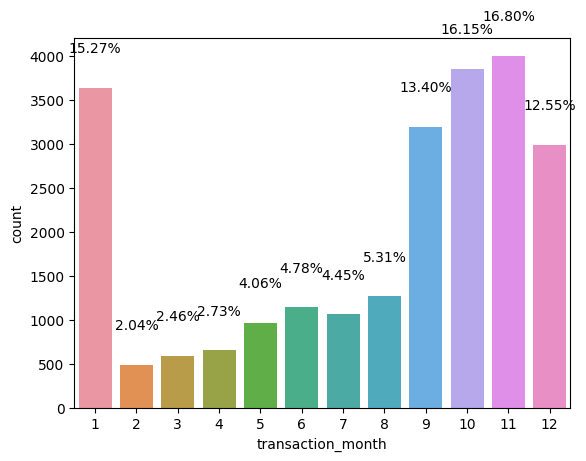

In [ ]:
barplot('transaction_month',train)

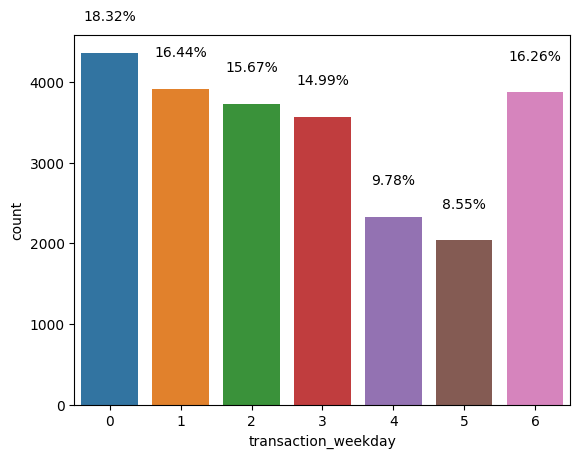

In [ ]:
barplot('transaction_weekday',train)

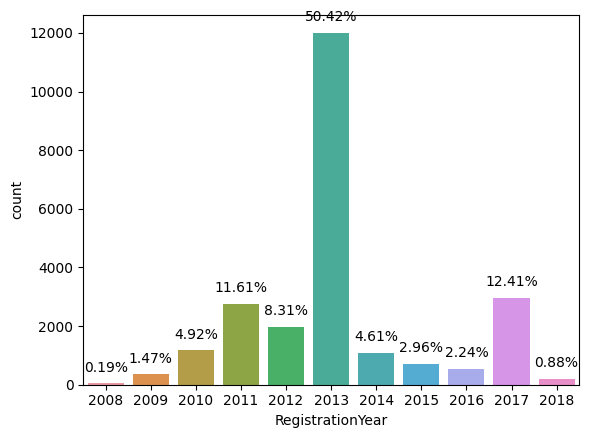

In [ ]:
barplot('RegistrationYear',train)

*Highlights from the plots above*
1)When lesser mails are being lesser ammount of people are intrested in getting engaged in transactions.
2)

In [ ]:
train["RegistrationYear"]=train["RegistrationYear"].astype("category")

In [ ]:
#feature elimination for numerical columns
train=train.drop(['Totalorderquantity_in_first_quarter',
       'Totalorderquantity_in_second_quarter',
       'Totalorderquantity_in_Third_quarter','minimumorderquantity', 'maximumorderquantity','averageorders'],axis=1)


<Axes: >

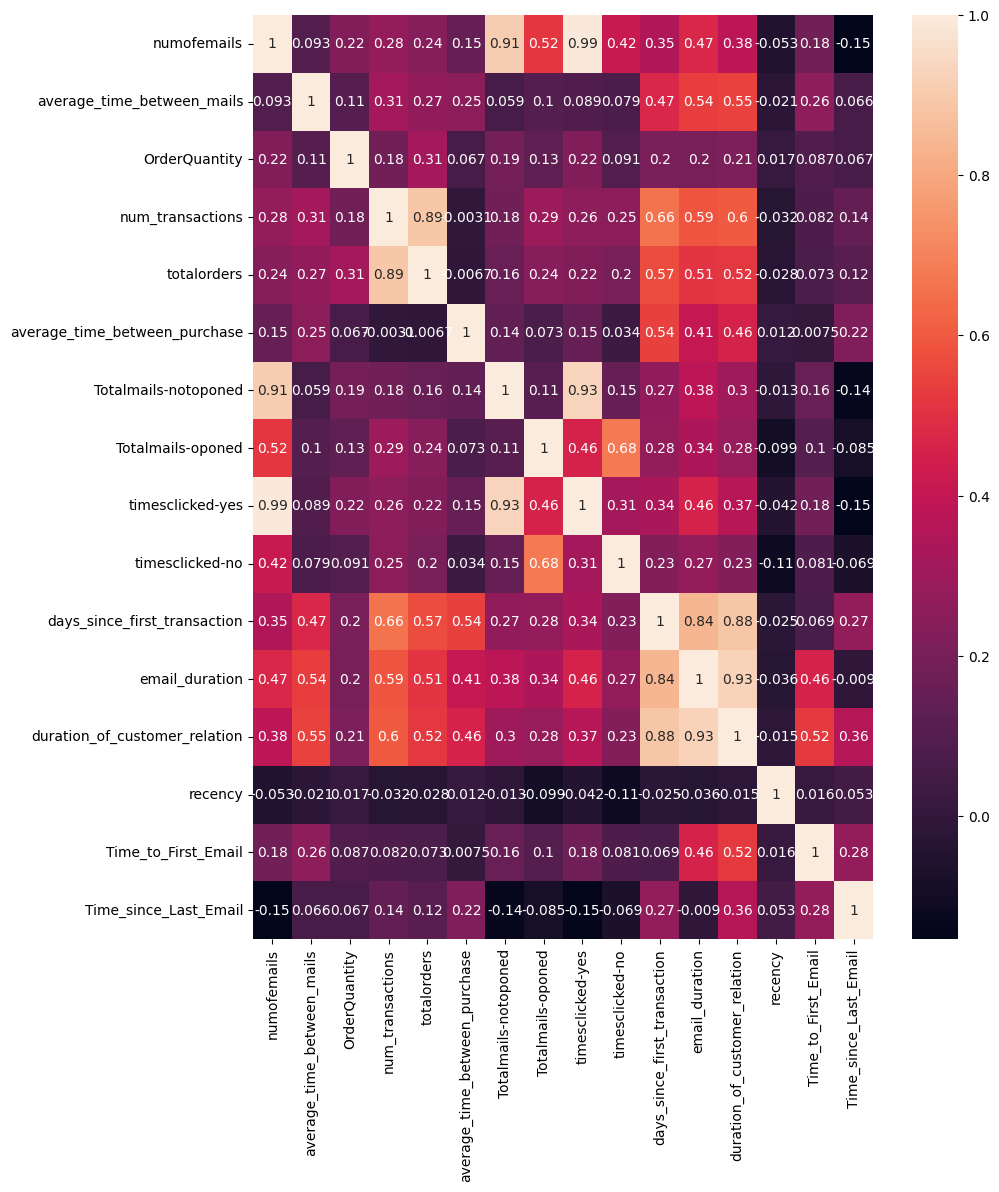

In [ ]:
num_cols=train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,12))
sns.heatmap(num_cols.corr(),annot=True)

if we observe correlation for num of emails we can see that,for total mails not oponed,oponed,time clicked yes or no has highest correlation with num of mails,we can convert them into categorical columns like we did earlier lets try to do it

In [ ]:
train['open_rate'] = np.log(train['Totalmails-oponed'] / train['numofemails'])
train['click_through_rate'] = np.log(train['totalorders'] / train['Totalmails-oponed'])
train['response_rate'] = np.log(train['totalorders'] / train['numofemails'])
train['open_rate_ratio'] =np.log(train['Totalmails-oponed'] / train['Totalmails-notoponed'])
train['click_through_rate_ratio'] = np.log(train['timesclicked-yes'] / train['timesclicked-no'])
train['response_rate_ratio'] = np.log(train['totalorders']) / (train['numofemails'] - train['totalorders'])

In [ ]:
train[['open_rate',
       'click_through_rate', 'response_rate', 'open_rate_ratio',
       'click_through_rate_ratio', 'response_rate_ratio']].describe()

open_rate  click_through_rate  response_rate  open_rate_ratio  \
count  23820.000000        2.382000e+04   2.382000e+04     2.382000e+04   
mean      -0.962155                -inf           -inf              inf   
std        1.184260                 NaN            NaN              NaN   
min       -4.290459                -inf           -inf    -4.290459e+00   
25%       -1.824549        2.708050e+00   1.082514e+00    -1.686399e+00   
50%       -0.342945        3.713572e+00   2.819948e+00     6.931472e-01   
75%        0.000000        4.094345e+00   3.713572e+00              NaN   
max        0.693147        1.005410e+01   9.879758e+00              inf   

       click_through_rate_ratio  response_rate_ratio  
count              1.411100e+04         2.377600e+04  
mean                        NaN                  NaN  
std                         NaN                  NaN  
min                        -inf                 -inf  
25%                2.335375e+00        -9.692826e-02  
50%                3.555348e+00        -7.635177e-02  
75%                         NaN        -2.853937e-02  
max                         inf                  inf

In [ ]:
# Replace inf and NaN values in selected columns
cols = ['open_rate_ratio', 'click_through_rate_ratio', 'response_rate_ratio','click_through_rate','open_rate','response_rate']
replace_value = 0 # Replace with NaN, or any other value you want
train[cols] = train[cols].replace([np.inf, -np.inf], 0)
train[cols] = train[cols].fillna(replace_value)

In [ ]:
train=train.drop(['Totalmails-notoponed','Totalmails-oponed', 'timesclicked-yes', 'timesclicked-no'],axis=1)

In [ ]:
#lets do modelling

In [ ]:
train = train.rename(columns={'totalorders': 'sumoforderquantity'})

In [ ]:
train.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'RetentionPotential',
       'EmailType', 'MailOpened', 'MailClicked', 'numofemails',
       'average_time_between_mails', 'OrderQuantity', 'num_transactions',
       'sumoforderquantity', 'average_time_between_purchase',
       'days_since_first_transaction', 'email_duration',
       'duration_of_customer_relation', 'recency',
       'days_since_first_transaction_category', 'email_duration_category',
       'RegistrationYear', 'customer_segment', 'Time_to_First_Email',
       'Time_since_Last_Email', 'most_ordered_quarter', 'Registration_month',
       'Registration_weekday', 'lastemail_month', 'lastemail_weekday',
       'transaction_month', 'transaction_weekday', 'open_rate',
       'click_through_rate', 'response_rate', 'open_rate_ratio',
       'click_through_rate_ratio', 'response_rate_ratio'],
      dtype='object')

In [ ]:
# split into input (X) and output (y) variables
X=train.drop(['CustomerID','RetentionPotential','days_since_first_transaction_category', 'email_duration_category'], axis=1)
y=train["RetentionPotential"]

In [ ]:
#label encoding of target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [ ]:
cat_cols=train.select_dtypes(include=['category'])
cat_cols=cat_cols.drop(["CustomerID","RetentionPotential",'days_since_first_transaction_category', 'email_duration_category'],axis=1)
cat_cols=cat_cols.columns

In [ ]:
num_cols=train.select_dtypes(include=['int64', 'float64'])
num_cols=num_cols.drop(['open_rate','click_through_rate', 'response_rate', 'open_rate_ratio','click_through_rate_ratio', 'response_rate_ratio'],axis=1)
num_cols=num_cols.columns

In [ ]:
 ## Convert Categorical Columns to Dummies
X = pd.get_dummies(X, columns=cat_cols,drop_first=True)
#scaling 
scaler = StandardScaler()
# scale on train
X[num_cols] =scaler.fit_transform(X[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.25,random_state=107,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (17865, 97)
X _test Size: (5955, 97)
Y_train Size: (17865,)
Y_test Size: (5955,)


In [ ]:
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)


#Defining error metrics

In [ ]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [ ]:
#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [ ]:
Z

NameError: ignored

#Model building

We will experiment different models until we find out a generalized model out of all.

1)naivebayes classifier

2)decision tree classifier

3)random forest classifier

4)support vector machines classifier

5)logistic regression-(one vs all approach)

6)boosting techniques

7)neuralnetworks

8)knn classifier


we will choose the best model from all and then try to draw learning patterns for all this models.


##  1)**Models**

###**1)Naive bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn import svm
NB1 =  GaussianNB()
NB1=NB1.fit(X_train, y_train)
y_pred_train =NB1.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = NB1.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))
print("recall-train",recall_score(y_train,y_pred_train,average='macro'))
print("recall-test",recall_score(y_test,y_pred_test,average='macro'))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GaussianNB",scores)
scores

trainaccuracy 0.8189125952695346
testaccuracy 0.7536523929471033
recall-train 0.8189125952695346
recall-test 0.6871089030232566

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.7216    0.8841    0.7946     14389
           1     0.8556    0.7392    0.7931     14389
           2     0.9151    0.8334    0.8723     14389

    accuracy                         0.8189     43167
   macro avg     0.8307    0.8189    0.8200     43167
weighted avg     0.8307    0.8189    0.8200     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.4021    0.8765    0.5512       939
           1     0.9555    0.7440  

Model  Train_Accuracy  Train_Recall  Train_Precision  Train_F1_Score  \
0  GaussianNB        0.818913      0.818913         0.830748        0.820035   

   Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0       0.753652     0.687109        0.638356       0.626734

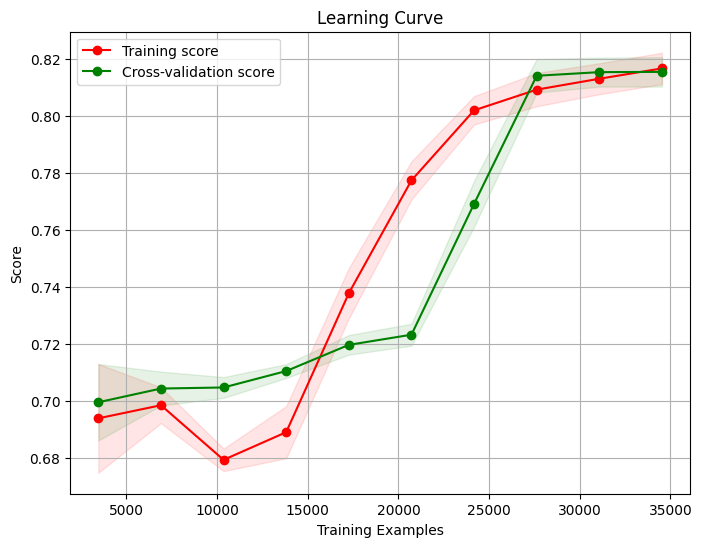

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(NB1, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**As per observation from learning curve,Naive bayes classifier models seems to underfit.The reason for our model underfitting could be lesser training data,but if we observe classification report we could see that recall for target label is also low.So,we will further decide on checking other models.Here we are not getting desired perfomance.**

###2)**Decision tree classifier**

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decisiontree",scores)
scores


Train Accuracy: 0.994046378020247
Test Accuracy: 0.8604534005037784

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9865    0.9964    0.9914     14389
           1     0.9958    0.9863    0.9910     14389
           2     0.9999    0.9994    0.9997     14389

    accuracy                         0.9940     43167
   macro avg     0.9941    0.9940    0.9940     43167
weighted avg     0.9941    0.9940    0.9940     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5972    0.6741    0.6333       939
           1     0.9329    0.9010    0.9166      4796
           2     0.6464    0.7727    0.70

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0    GaussianNB        0.818913      0.818913         0.830748   
1  Decisiontree        0.994046      0.994046         0.994078   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294

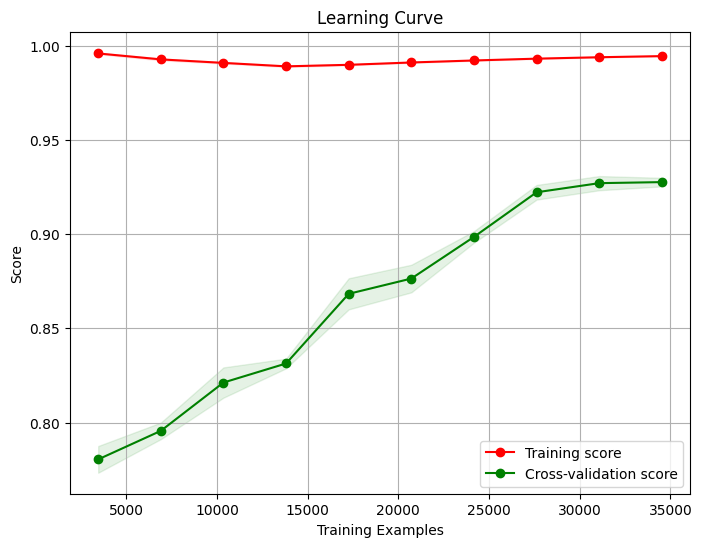

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**As per observation from our learning curve we could see that model is overfitting.Best models should always generalize well when faced with instances that were not part of the initial training data.There is a large gap between training and validation data.To adress this issue we can either add more data or do hyperparamter tuning for better results.**

###3)**Randomforestclassifer**

In [ ]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"randomforest",scores)
scores

Train Accuracy: 0.994046378020247
Test Accuracy: 0.8943744752308984

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9902    0.9926    0.9914     14389
           1     0.9921    0.9900    0.9911     14389
           2     0.9998    0.9996    0.9997     14389

    accuracy                         0.9940     43167
   macro avg     0.9940    0.9940    0.9940     43167
weighted avg     0.9940    0.9940    0.9940     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6909    0.6880    0.6894       939
           1     0.9350    0.9393    0.9372      4796
           2     0.8663    0.7955    0.82

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0    GaussianNB        0.818913      0.818913         0.830748   
1  Decisiontree        0.994046      0.994046         0.994078   
2  randomforest        0.994046      0.994046         0.994048   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294  
2        0.994047       0.894374     0.807582        0.830760       0.818664

**It is also example of overfiiting as there is a huge gap between training and validation sets.**

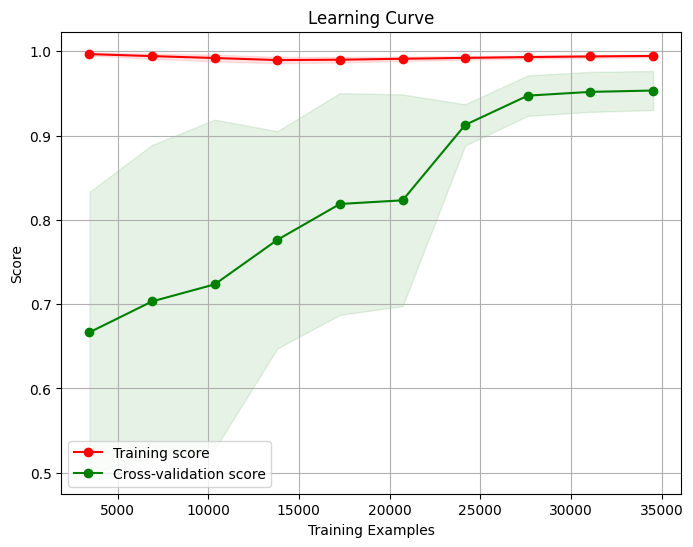

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**As per observation from our learning curve we could see that model is overfitting.Best models should always generalize well when faced with instances that were not part of the initial training data.There is a large gap between training and validation data.To adress this issue we can either add more data or do hyperparamter tuning for better results.**

In [ ]:
importances = clf_rf.feature_importances_
importances
np.argsort(importances)[::-1]
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

0              1                   2                   3   \
0  numofemails  response_rate  click_through_rate  sumoforderquantity   
1     0.086848        0.08228            0.067014            0.060401   

                      4                 5                    6         7   \
0  Time_since_Last_Email  num_transactions  response_rate_ratio   recency   
1               0.057166          0.056245             0.052839  0.049158   

          8                             9                    10  \
0  open_rate  days_since_first_transaction  AutomaticRefill_yes   
1   0.040624                      0.039662             0.030684   

                              11               12                   13  \
0  duration_of_customer_relation  open_rate_ratio  Time_to_First_Email   
1                       0.029277         0.026885             0.023771   

              14                        15              16  \
0  OrderQuantity  click_through_rate_ratio  email_duration   
1       0.021456                  0.020191        0.018809   

                           17                      18              19  \
0  average_time_between_mails  EmailType_WelcomeEmail  MailClicked_no   
1                    0.017567                 0.01627        0.014636   

                        20                             21          22  \
0  OnlineCommunication_yes  average_time_between_purchase  City_CITY4   
1                 0.013752                       0.013082    0.006666   

               23                            24                           25  \
0  MailOpened_yes  PreferredDeliveryDay_Tuesday  PreferredDeliveryDay_Monday   
1        0.006645                      0.005638                     0.005516   

                26                     27          28          29  \
0  MailClicked_yes  RegistrationYear_2013  City_CITY2  City_CITY3   
1         0.005411               0.005406    0.005197    0.005146   

                      30                              31  \
0  RegistrationYear_2014  PreferredDeliveryDay_Wednesday   
1                 0.0049                        0.004444   

                      32                             33                  34  \
0  Registration_month_12  PreferredDeliveryDay_Thursday  lastemail_month_12   
1               0.004426                       0.004422            0.004096   

                        35                                     36  \
0  most_ordered_quarter_Q3  customer_segment_small_order_customer   
1                  0.00374                                0.00348   

                        37                    38                     39  \
0  most_ordered_quarter_Q2  transaction_month_12  RegistrationYear_2017   
1                 0.002831              0.002689               0.002672   

                      40                      41                   42  \
0  transaction_weekday_1  Registration_weekday_3  lastemail_weekday_1   
1               0.002625                0.002615             0.002558   

                    43                   44                     45  \
0  transaction_month_9  lastemail_weekday_3  transaction_weekday_6   
1             0.002511             0.002487                0.00247   

                      46                     47                     48  \
0  transaction_weekday_2  transaction_weekday_3  Registration_month_11   
1                0.00247               0.002392               0.002245   

                     49                      50                      51  \
0  Registration_month_9  Registration_weekday_1  Registration_weekday_2   
1              0.002235                0.002166                0.002158   

                  52                   53                   54  \
0  lastemail_month_9  lastemail_weekday_2  lastemail_weekday_6   
1           0.002132             0.002107             0.002074   

                    55                      56                      57  \
0  lastemail_weekday_4  Registration_weekday_4  Regis

###4)**SVMCLASSIFIER**

In [ ]:
from sklearn.svm import SVC 
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores)
scores

Train Accuracy: 0.9170662774804827
Test Accuracy: 0.8451721242653233

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8619    0.9131    0.8868     14389
           1     0.9279    0.8645    0.8951     14389
           2     0.9649    0.9736    0.9692     14389

    accuracy                         0.9171     43167
   macro avg     0.9183    0.9171    0.9170     43167
weighted avg     0.9183    0.9171    0.9170     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5316    0.8051    0.6404       939
           1     0.9536    0.8572    0.9028      4796
           2     0.7477    0.7545    0.7

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0     GaussianNB        0.818913      0.818913         0.830748   
1   Decisiontree        0.994046      0.994046         0.994078   
2   randomforest        0.994046      0.994046         0.994048   
3  SVMCLASSIFIER        0.917066      0.917066         0.918263   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294  
2        0.994047       0.894374     0.807582        0.830760       0.818664  
3        0.917038       0.845172     0.805610        0.744333       0.764787

**This comes under a generalized model,we will further analyze by learning curves while doing hyper parameter tuning,but the problem with svm is it takes so much time,we will check for alternative models if we didnt find any then we will use svm classifier**

###5)**XGBOOST CLASSIFIER**

In [ ]:
# Import XGBClassifier Library

from xgboost import XGBClassifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBOOST",scores)
scores

Train Accuracy: 0.9754673709083328
Test Accuracy: 0.9019311502938707

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9664    0.9626    0.9645     14389
           1     0.9615    0.9655    0.9635     14389
           2     0.9985    0.9983    0.9984     14389

    accuracy                         0.9755     43167
   macro avg     0.9755    0.9755    0.9755     43167
weighted avg     0.9755    0.9755    0.9755     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.7175    0.7220    0.7197       939
           1     0.9406    0.9408    0.9407      4796
           2     0.8498    0.8227    0.8

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0     GaussianNB        0.818913      0.818913         0.830748   
1   Decisiontree        0.994046      0.994046         0.994078   
2   randomforest        0.994046      0.994046         0.994048   
3  SVMCLASSIFIER        0.917066      0.917066         0.918263   
4        XGBOOST        0.975467      0.975467         0.975476   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294  
2        0.994047       0.894374     0.807582        0.830760       0.818664  
3        0.917038       0.845172     0.805610        0.744333       0.764787  
4        0.975469       0.901931     0.828519        0.835938       0.832153

**XGBOOST CLASSIFIER is overfitting,which means it might not be good when it is predicting test data or unseen instances.We will further see and check whether we should use this or not**

**ADABOOST CLASSIFIER**

In [ ]:

clf_ada = AdaBoostClassifier(base_estimator=GaussianNB(),random_state=123)
clf_ada.fit(X_train, y_train)


y_pred_train = clf_ada.predict(X_train)
y_pred_test = clf_ada.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"AdaBoostClassifier",scores)
scores

Train Accuracy: 0.582134500891885
Test Accuracy: 0.7842149454240135

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5729    0.2511    0.3491     14389
           1     0.4819    0.9372    0.6365     14389
           2     0.9049    0.5581    0.6904     14389

    accuracy                         0.5821     43167
   macro avg     0.6532    0.5821    0.5587     43167
weighted avg     0.6532    0.5821    0.5587     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.2916    0.1289    0.1787       939
           1     0.8230    0.9425    0.8787      4796
           2     0.6042    0.1318    0.21

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0          GaussianNB        0.818913      0.818913         0.830748   
1        Decisiontree        0.994046      0.994046         0.994078   
2        randomforest        0.994046      0.994046         0.994048   
3       SVMCLASSIFIER        0.917066      0.917066         0.918263   
4             XGBOOST        0.975467      0.975467         0.975476   
5  AdaBoostClassifier        0.582135      0.582135         0.653207   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294  
2        0.994047       0.894374     0.807582        0.830760       0.818664  
3        0.917038       0.845172     0.805610        0.744333       0.764787  
4        0.975469       0.901931     0.828519        0.835938       0.832153  
5        0.558683       0.784215     0.401044        0.572916       0.424614

**An underfitting model with lesser recall score for target '2' in both train and validation sets**

###6)**GRADIENTBOOSTINGCLASSIFIER**

In [ ]:
clf_GBM = GradientBoostingClassifier()
clf_GBM.fit(X=X_train, y=y_train)

y_pred_train = clf_GBM.predict(X_train)
y_pred_test = clf_GBM.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)

Train Accuracy: 0.9245951768712211
Test Accuracy: 0.8680100755667506

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8904    0.9091    0.8997     14389
           1     0.9138    0.8964    0.9050     14389
           2     0.9701    0.9683    0.9692     14389

    accuracy                         0.9246     43167
   macro avg     0.9248    0.9246    0.9246     43167
weighted avg     0.9248    0.9246    0.9246     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5967    0.7657    0.6707       939
           1     0.9511    0.8878    0.9184      4796
           2     0.7033    0.8727    0.7

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_GBM, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: ignored

**If the gap between the training and validation performance in the learning curve is small, it generally indicates that the model is generalizing well and is not overfitting on the training data. This means that the model is learning patterns that are useful for making predictions on new, unseen data.**

###7)**KNNCLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=5
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
clf_knn.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train = clf_knn.predict(X_train)
y_pred_test = clf_knn.predict(X_test)

# Print the accuracy scores for the training and test data
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

# Print the classification report for the training and test data
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

# Get the metrics for the classifier and add them to the scores dictionary
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNN",scores)


**The model has a higher accuracy on the training set (90.14%) than on the test set (87.24%), which suggests that the model may be overfitting to the training data.The recall values for the first and third classes are relatively low, especially in the test set, which suggests that the model may be struggling to correctly identify instances of these classes.**

###8)**ANN-CLASSIFIER**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Get the predicted class probabilities for the train and test data
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

# Get the predicted classes by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
# Print the accuracy scores for the training and test data
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

# Print the classification report for the training and test data
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
# Get the metrics for the classifier and add them to the scores dictionary
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"ANN-CLASSIFICATION",scores)

Epoch 1/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3929 - accuracy: 0.8374 - val_loss: 0.3369 - val_accuracy: 0.8465
Epoch 2/10
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2638 - accuracy: 0.8917 - val_loss: 0.3378 - val_accuracy: 0.8388
Epoch 3/10
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2352 - accuracy: 0.9034 - val_loss: 0.3026 - val_accuracy: 0.8660
Epoch 4/10
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2188 - accuracy: 0.9079 - val_loss: 0.3412 - val_accuracy: 0.8469
Epoch 5/10
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2081 - accuracy: 0.9140 - val_loss: 0.3103 - val_accuracy: 0.8578
Epoch 6/10
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1983 - accuracy: 0.9163 - val_loss: 0.3218 - val_accuracy: 0.8556
Epoch 7/10
1349/1349 [==============================] - 2s 1ms/step - loss: 0.1925 - accuracy: 0.9188 - val_loss: 0.3315 - val_accuracy:

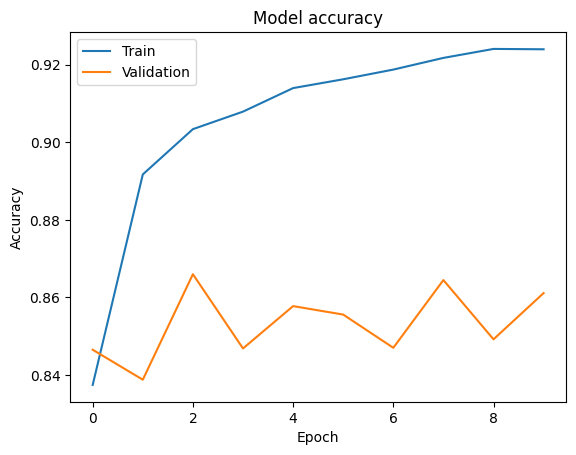

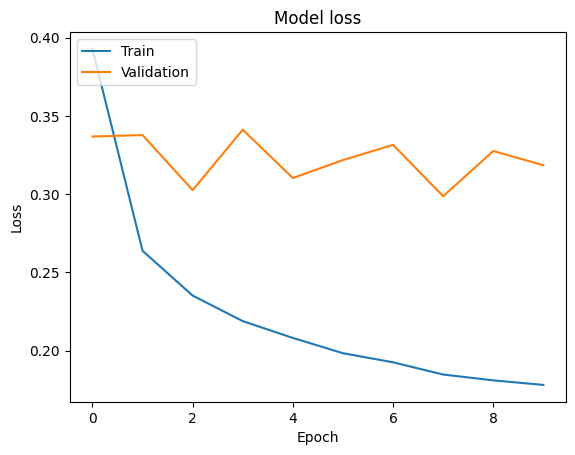

In [ ]:
# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Both training and test accuracies have increased, and the gap between them has also decreased, which is a good sign. Additionally, looking at the classification report, we can see that the precision, recall, and F1-scores have also improved for all three classes in the test data.**

In [ ]:
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0          GaussianNB        0.818913      0.818913         0.830748   
1        Decisiontree        0.994046      0.994046         0.994078   
2        randomforest        0.994046      0.994046         0.994048   
3       SVMCLASSIFIER        0.917066      0.917066         0.918263   
4             XGBOOST        0.975467      0.975467         0.975476   
5  AdaBoostClassifier        0.582135      0.582135         0.653207   
6                 GBM        0.924595      0.924595         0.924794   
7  ANN-CLASSIFICATION        0.938703      0.938703         0.938751   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.820035       0.753652     0.687109        0.638356       0.626734  
1        0.994046       0.860453     0.782603        0.725472       0.751294  
2        0.994047       0.894374     0.807582        0.830760       0.818664  
3        0.917038       0.845172     0.805610        0.744333       0.764787  
4        0.975469       0.901931     0.828519        0.835938       0.832153  
5        0.558683       0.784215     0.401044        0.572916       0.424614  
6        0.924634       0.868010     0.842086        0.750354       0.789326  
7        0.938654       0.861125     0.778416        0.763906       0.768223

In [222]:
scores.to_csv('basemodels-smote',index=False)

##**2)Choosing best models**

*1)ANN-CLASSIFIER* has been by far the best model as generalized model was built with the help of ann model.And morover overall recall score is good and there is a scope of improvment too,which we will do with the help of hyperparamter tuning.
********************************************************
*2)DECISIONTREE,RANDOMFOREST,XGBOOST,KNN*:-This models are overfitting they might not perform well when compared to other models when unseen data is fed into them.we will do hyperparamter tuning for all this models and decide which model to select. 
********************************************************
*3)Naivebayesclssifier,Adaboost classifier*:-This models are underfitting and may be there perfomance might be increased when there are more examples in training data sets.
********************************************************
*4)GBM*-This model is learning patterns which can be useful when prediciting unseen data.it is a genralized model as we ca observe from learning curve
********************************************************
*5)SVM CLASSIFIER*-This model is learning patterns which can be useful when prediciting unseen data.it is a genralized model as we can observe from learning curves.Only problem with svm is it is computationally inefficient.
********************************************************
**For next set of scoring we will choose ANN CLASSIFIER,GBM,SVM CLASSIFIER and randomforest,xgboost.
 so we will build models using different hyperparameters.and check which one is perfoming better.**
********************************************************

##3)Validation and paramter Tuning

In [225]:
scores1 = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
   
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

For validation purpose we will use stratified k fold technique,Stratified k-fold cross-validation is a variation of k-fold cross-validation that aims to ensure that each fold is representative of the overall distribution of the target variable. This is particularly useful when the dataset is imbalanced, meaning that some classes may have significantly fewer samples than others.

For parameter tuning we will use randomized search cv as grid search cv is time-consuming and computationally expensive, especially if the hyperparameters are too many..

In [224]:
# Define the stratified k-fold cross-validator
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV

**Lets start randomized search cv with our overfit models first**

In [ ]:
#after running randomized search cv and getting results from it we are going to store it as a text to ensure lesser run time.



```
#Decision Tree with RandomizedSearchCV - Hyper-parameter Tuning
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }
dt = DecisionTreeClassifier(random_state=123)
clf_dt_grid = RandomizedSearchCV(dt, param_grid,cv=skf,scoring='recall')
clf_dt_grid.fit(X_train, y_train)  
print(clf_dt_grid.best_params_) 
```



###1)**Decision tree with hyperparamters**

**output:-{'min_samples_leaf': 5,
 'max_leaf_nodes': 20,
 'max_depth': 6,
 'criterion': 'gini',
 'class_weight': 'balanced'}**

In [223]:
clf_dt_grid = DecisionTreeClassifier(min_samples_leaf=10, max_leaf_nodes=30, max_depth=8, criterion='entropy', class_weight='balanced')
clf_dt_grid.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid.predict(X_train)
y_pred_test = clf_dt_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


Train Accuracy: 0.8493293488081173
Test Accuracy: 0.8411418975650714

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8635    0.7476    0.8014     14389
           1     0.7876    0.8607    0.8225     14389
           2     0.9024    0.9397    0.9206     14389

    accuracy                         0.8493     43167
   macro avg     0.8511    0.8493    0.8482     43167
weighted avg     0.8511    0.8493    0.8482     43167


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6177    0.7295    0.6689       939
           1     0.9496    0.8605    0.9029      4796
           2     0.3940    0.8955    0.5

In [226]:
scores1= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTree_BestParameters",scores1)
scores1

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  DecisionTree_BestParameters        0.849329      0.849329         0.851141   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.848179       0.841142     0.828488        0.653761       0.706344

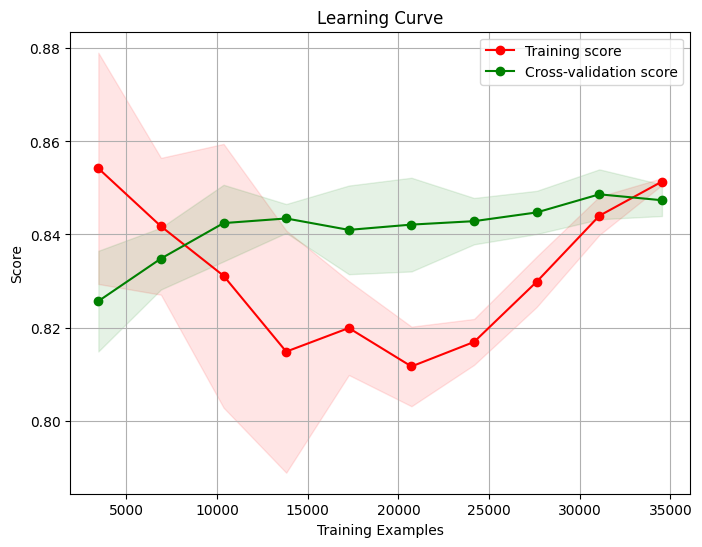

In [227]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_dt_grid, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

###2)**Decisiontree with randomized search cv using different paramters.**


```
#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

clf3_dt = DecisionTreeClassifier(random_state=123, class_weight='balanced') 
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)
max_leaf_nodes[max_leaf_nodes <1] = 1
print(max_leaf_nodes)
max_depth = np.random.uniform(2,5,4).astype(int)
print(max_depth)
min_samples_split = np.random.uniform(2, 6, 5).astype(int)
print(min_samples_split)
## Set Up Hyperparameter Distributions
# normally distributed max_leaf_nodes, with mean 5 stddev 1
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)

# uniform distribution from 2 to 5 
max_depth = np.random.uniform(2,5,4).astype(int)

# uniform distribution from 2 to 6
min_samples_split = np.random.uniform(2, 6, 5).astype(int)

model_params = {
    'max_depth': list(max_depth),
    'max_leaf_nodes': list(max_leaf_nodes),
    'min_samples_split': list(min_samples_split)
}
clf_random = RandomizedSearchCV(estimator=clf3_dt, param_distributions=model_params, n_iter=600, cv=skf, scoring='recall', n_jobs=-1)
clf_random.fit(X_train, y_train)
print(clf_random.best_score_, clf_random.best_params_)
clf_dt_random = clf_random.best_estimator_
print(clf_dt_random)
```






DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=5,
                       min_samples_split=3, random_state=123)

In [ ]:
clf_dt_grid2 = DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       min_samples_split=3, random_state=123)
clf_dt_grid2.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid2.predict(X_train)
y_pred_test = clf_dt_grid2.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

**Its not a generalized model like our previous one,we will not use this model..**

**2)Random forest with hyperparamter tuning**



```
param_grid = {#"n_estimators" : [50,60],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 7],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }
rfclf2 = RandomForestClassifier()
rfclf_grid = RandomizedSearchCV(rfclf2, param_grid, cv=skf)     
rfclf_grid.fit(X_train, y_train)
print(rfclf_grid.best_params_)
rfclf_grid = rfclf_grid.best_estimator_ 
print(rfclf_grid)
```
RandomForestClassifier(ccp_alpha=0.0001, min_samples_split=5)


In [ ]:
rfclf_grid =RandomForestClassifier(ccp_alpha=0.0001, min_samples_split=5)

rfclf_grid.fit(X=X_train, y= y_train)

y_pred_train = rfclf_grid.predict(X_train)
y_pred_test = rfclf_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

**its clearly a overfitting model**

Lets build random forest using variable importance

In [ ]:
importances = rfclf_grid.feature_importances_
importances
indices = np.argsort(importances)[::-1]
print(indices)
select = indices[0:30]
print(select)
rfclf4 = RandomForestClassifier(criterion= 'entropy', 
                                max_depth= 3, 
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                ccp_alpha=0.001)

rfclf4 = rfclf4.fit(X_train.values[:,select], y_train)


y_pred_train = rfclf4.predict(X_train.values[:,select])
y_pred_test = rfclf4.predict(X_test.values[:,select])
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

**Its an overfitting model**

###**3)XGBOOST MODEL WITH RANDOMIZED CV**



```
#clf_XGB_grid = XGBClassifier()
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100, 200],
     'max_depth': [3, 4],
     'gamma': [0.2,0.3,0.4],
     'learning_rate': [0.001, 0.01, 0.1, 1, 10],
     'scale_pos_weight':[4]
}
CV_XGB = RandomizedSearchCV(estimator=clf_XGB_grid, param_distributions=param_grid, n_jobs=-1,cv=skf, scoring='recall')
%time CV_XGB.fit(X = X_train, y=y_train)
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)
CV_XGB = CV_XGB.best_estimator_ 
print(CV_XGB)

```



{'scale_pos_weight': 4, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.6}

In [ ]:
CV_XGB =XGBClassifier(scale_pos_weight=4,n_estimators=200,max_depth=4,learning_rate=0.1,gamma=0.4,colsample_bytree=0.6)

CV_XGB.fit(X=X_train, y= y_train)

y_pred_train = CV_XGB.predict(X_train)
y_pred_test = CV_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

In [ ]:
scores1= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGB_BestParameters",scores1)
scores1

###**4)GBM,SVM,ANN-HYPERPARAMTER TUNING**



```
#Gradient boosting with hyperparamter tuning
# define the hyperparameter space
param_dist = {'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,4,6],
              'max_features': ['auto', 'sqrt', 'log2'],}

# define the classifier
clf = GradientBoostingClassifier()

# define the random search with cross validation
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=skf,scoring='recall')

# fit the random search to the data
random_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)
```
Best hyperparameters:  {'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.01}



In [ ]:
clf_GBM = GradientBoostingClassifier(max_features='sqrt',max_depth=4,learning_rate=0.01)
clf_GBM.fit(X=X_train, y=y_train)

y_pred_train = clf_GBM.predict(X_train)
y_pred_test = clf_GBM.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)

**Its not a overfitting model but a generalized model in which recall of 0,2 are very less,our model is good in predicting 1 label but not 0 and 2**

##4)Decision tree pattern extraction

In [228]:
from sklearn.tree import export_text
rules = export_text(clf_dt_grid, feature_names=X_train.columns.tolist())
# Sort rules by importance scores and select the top 20 rules
rule_scores = clf_dt_grid.feature_importances_
rule_list = rules.split('\n')
rule_list.pop() # Remove the last empty element
rule_importance = [(rule, score) for rule, score in zip(rule_list, rule_scores)]
rule_importance_sorted = sorted(rule_importance, key=lambda x: x[1], reverse=True)
top_20_rules = [rule for rule, score in rule_importance_sorted[:20]]

# Print the top 20 rules
print("Top 20 rules:")
for rule in top_20_rules:
    print(rule)

Top 20 rules:
|--- sumoforderquantity <= -0.10
|   |   |   |   |--- recency <= 0.24
|   |   |   |   |   |   |--- RegistrationYear_2014 >  0.50
|   |   |   |   |   |   |--- RegistrationYear_2014 <= 0.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- AutomaticRefill_yes <= 0.50
|   |   |   |--- AutomaticRefill_yes >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- duration_of_customer_relation <= -0.48
|   |   |   |   |   |--- MailClicked_yes >  0.50
|   |   |   |   |--- class: 2
|   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- RegistrationYear_2014 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- numofemails <= -0.26
|   |   |   |   |   |--- OnlineCommunication_yes <= 0.50
|   |   |   |   |   |--- OnlineCommunication_yes >  0.50
